In [1]:
import os
directory = "datasets"
files = os.listdir(directory)

In [2]:
import pandas as pd

directory = "datasets"

data = pd.concat(
    [
        pd.read_excel(os.path.join(directory, file)).rename(
            columns=lambda x: x.strip().replace(" ", "_").translate(str.maketrans("", "", r"""!"#$%&'()*+,./:;<=>?@[\]^`{|}~"""))
        )
        for file in os.listdir(directory)
        if file.endswith((".xlsx", ".xls"))
    ],
    ignore_index=True, 
)



In [3]:
data.c

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...   reject   
1     Here's a resume for Hank Brown, a select candi...   select   
2     Here's a sample resume for Bob Jones, who appl...   reject   
3     Here's a sample resume for Bob Miller, a Softw...   select   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...   reject   
...                                                 ...      ...   
3169  ananya bansal\ncontact information:\n\n* phone...   select   
3170  diya singh\ncontact information:\n\n* email: [...   reject   
3171  harshitha kapoor\nui engineer\n\ncontact infor...   select   
3172  kabir chopra\ncontact information:\n\n* email:...   reject   
3173  aditya singh\ncontact information:\n\n* email:...   reject   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  
0                         528  
1                         804  
2                         503  
3                         665  
4                         573  
...                       ...  
3169                      786  
3170                      735  
3171                      913  
3172                      806  
3173                      820  

[3174 rows 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3174 non-null   object
 1   Name                     3174 non-null   object
 2   Role                     3174 non-null   object
 3   Transcript               3174 non-null   object
 4   Resume                   3174 non-null   object
 5   decision                 3174 non-null   object
 6   Reason_for_decision      3174 non-null   object
 7   Job_Description          3174 non-null   object
 8   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 223.3+ KB


In [5]:
# Checking for missing values
print(data.isnull().sum())

ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason_for_decision        0
Job_Description            0
num_words_in_transcript    0
dtype: int64


In [6]:
# Calculate resume and job description similarity (Cosine Similarity)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
resume_jd_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    jd = data['Job_Description'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, jd]))[0, 1]
    resume_jd_similarity.append(similarity)
data['resume_jd_similarity'] = resume_jd_similarity

In [7]:
# Calculate resume and transcript similarity (Cosine Similarity)
resume_transcript_similarity = []
for i in range(len(data)):
    resume = data['Resume'][i]
    transcript = data['Transcript'][i]
    similarity = cosine_similarity(vectorizer.fit_transform([resume, transcript]))[0, 1]
    resume_transcript_similarity.append(similarity)
data['resume_transcript_similarity'] = resume_transcript_similarity

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each transcript
data['sentiment'] = data['Transcript'].apply(lambda transcript: sia.polarity_scores(transcript)['compound'])

# Overall average sentiment score
average_sentiment = data['sentiment'].mean()
print("\nOverall Average Sentiment Score:")
print(f"   - Average Sentiment Score: {average_sentiment:.2f}")




Overall Average Sentiment Score:
   - Average Sentiment Score: 1.00


In [9]:
# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

# Compute lexical diversity for each transcript
data['lexical_diversity'] = data['Transcript'].apply(lexical_diversity)

# Calculate statistics
average_diversity = data['lexical_diversity'].mean()


'''Lexical diversity measures the variety of unique words in a text relative to the total number of words. 
'''


'Lexical diversity measures the variety of unique words in a text relative to the total number of words. \n'

In [10]:
# Length of transcript (number of words)
data['transcript_length_words'] = data['Transcript'].apply(lambda x: len(x.split()))

# Calculate statistics
average_length = data['transcript_length_words'].mean()
min_length = data['transcript_length_words'].min()
max_length = data['transcript_length_words'].max()


In [11]:
#Reason for Decision Length
data['reason_length'] = data['Reason_for_decision'].str.split().apply(len)


In [12]:
# Resume length (number of words)
data['resume_length'] = data['Resume'].apply(lambda x: len(x.split()))

In [13]:
#Word Count Ratio
data['word_count_ratio'] = data['transcript_length_words'] / data['resume_length']


In [14]:
#Role to Transcript Similarity

def text_similarity(text1, text2):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(vectors[0], vectors[1])[0, 0]

data['role_transcript_similarity'] = data.apply(
    lambda row: text_similarity(row['Role'], row['Transcript']), axis=1
)


In [15]:
from textblob import TextBlob
data['cultural_fit_sentiment'] = data['Reason_for_decision'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [16]:
#Job Description to Transcript Sentiment Gap
data['jd_transcript_sentiment_gap'] = data['sentiment'] - data['cultural_fit_sentiment']


In [17]:
#Job Description Length
data['job_desc_length'] = data['Job_Description'].str.split().apply(len)


In [18]:
#Role to Resume Similarity
data['role_resume_similarity'] = data.apply(
    lambda row: text_similarity(row['Role'], row['Resume']), axis=1
)


In [19]:
#Combined Text Similarity
data['combined_text_similarity'] = (
    data['resume_jd_similarity'] + data['resume_transcript_similarity']
) / 2


In [20]:
#Sentiment to Lexical Diversity Ratio
data['sentiment_to_diversity_ratio'] = data['sentiment'] / data['lexical_diversity']


In [21]:
#clarity score
import textstat
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))


In [22]:
#confidence score
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))


In [23]:
#Clarity and Confidence Interaction
data['clarity_confidence_interaction'] = data['clarity_score'] * data['confidence_score']


In [24]:
#Soft Skills
from textblob import TextBlob

data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [25]:
# Length of transcript (number of characters)
data['transcript_length_characters'] = data['Transcript'].apply(len)

# Calculate statistics
average_length = data['transcript_length_characters'].mean()
min_length = data['transcript_length_characters'].min()
max_length = data['transcript_length_characters'].max()

In [26]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Job_Description']), axis=1)


In [27]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match2'] = data.apply(lambda row: compute_similarity(row['Resume'], row['Transcript']), axis=1)


In [28]:
# Function to compute similarity score between Resume and Job Description
def compute_similarity(text1, text2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# Calculate technical skill matching score
data['technical_skill_match3'] = data.apply(lambda row: compute_similarity(row['Job_Description'], row['Transcript']), axis=1)


In [29]:
# Job Description Experience Match (Simple matching based on keywords, could be improved)
data['job_description_experience_match'] = data.apply(lambda row: len(set(row['Resume'].split()) & set(row['Job_Description'].split())), axis=1)


In [30]:
#job score
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job_Description'], row['Transcript']), axis=1)


In [31]:
#job description complexity
import textstat
data['job_desc_complexity'] = data['Job_Description'].apply(lambda x: textstat.flesch_reading_ease(x))

In [32]:
#interaction quality check
data['interaction_quality'] = data['num_words_in_transcript'] * data['sentiment']

In [33]:
# Text complexity (resume and transcript - using a simple metric like Flesch Reading Ease)
def text_complexity(text):
    # Implement text complexity (e.g., Flesch Reading Ease)
    # Here's a placeholder function:
    return len(text.split()) / len(set(text.split()))  # A basic metric

data['text_complexity_transcript'] = data['Transcript'].apply(text_complexity)
data['text_complexity_resume'] = data['Resume'].apply(text_complexity)


In [34]:
# Encoding the target variable (select/reject)
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['decision'] = le.fit_transform(data['decision'])  # 0: reject, 1: select


In [35]:
data

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume  decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...         0   
1     Here's a resume for Hank Brown, a select candi...         1   
2     Here's a sample resume for Bob Jones, who appl...         0   
3     Here's a sample resume for Bob Miller, a Softw...         1   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...         0   
...                                                 ...       ...   
3169  ananya bansal\ncontact information:\n\n* phone...         1   
3170  diya singh\ncontact information:\n\n* email: [...         0   
3171  harshitha kapoor\nui engineer\n\ncontact infor...         1   
3172  kabir chopra\ncontact information:\n\n* email:...         0   
3173  aditya singh\ncontact information:\n\n* email:...         0   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  resume_jd_similarity  ...  \
0                         528              0.552990  ...   
1                         804              0.345283  ...   
2                         503              0.666840  ...   
3                         665              0.533122  ...   
4                         573              0.597536  ...   
...                     

In [36]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description', 'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words', 'reason_length',
       'resume_length', 'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume'],
      dtype='object')

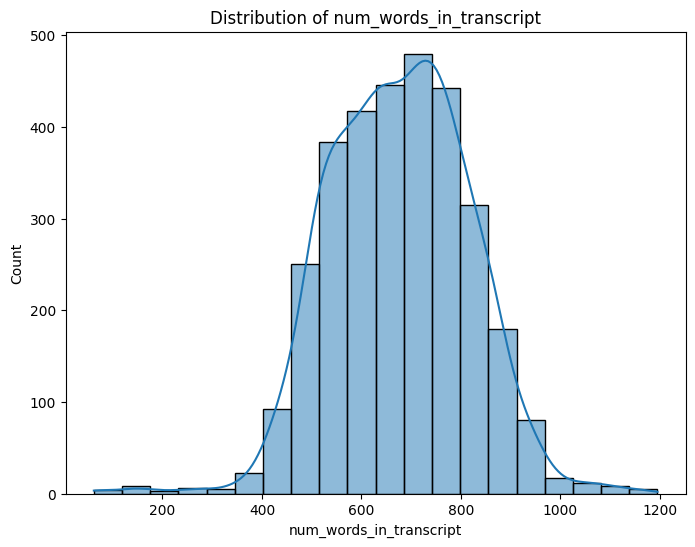

--- Summary of num_words_in_transcript Distribution ---
   - Mean: 676.58
   - Median: 679.00
   - Standard Deviation: 139.51
   - The distribution of num_words_in_transcript is negatively skewed.
   - num_words_in_transcript appears to have a skewed distribution.
   ----------------------------------------------------



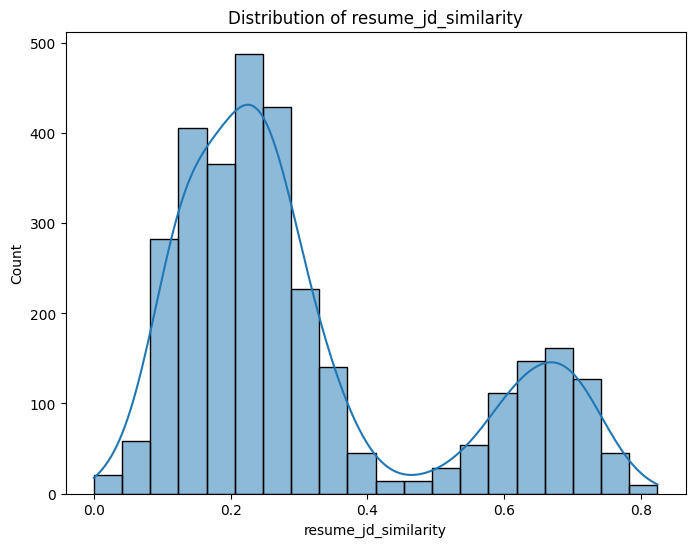

--- Summary of resume_jd_similarity Distribution ---
   - Mean: 0.31
   - Median: 0.24
   - Standard Deviation: 0.20
   - The distribution of resume_jd_similarity is positively skewed.
   - resume_jd_similarity appears to have a normal distribution.
   ----------------------------------------------------



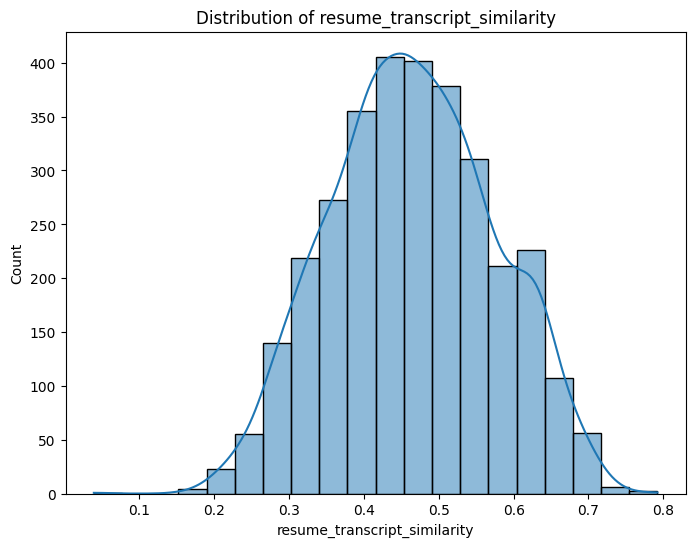

--- Summary of resume_transcript_similarity Distribution ---
   - Mean: 0.47
   - Median: 0.46
   - Standard Deviation: 0.11
   - The distribution of resume_transcript_similarity is positively skewed.
   - resume_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



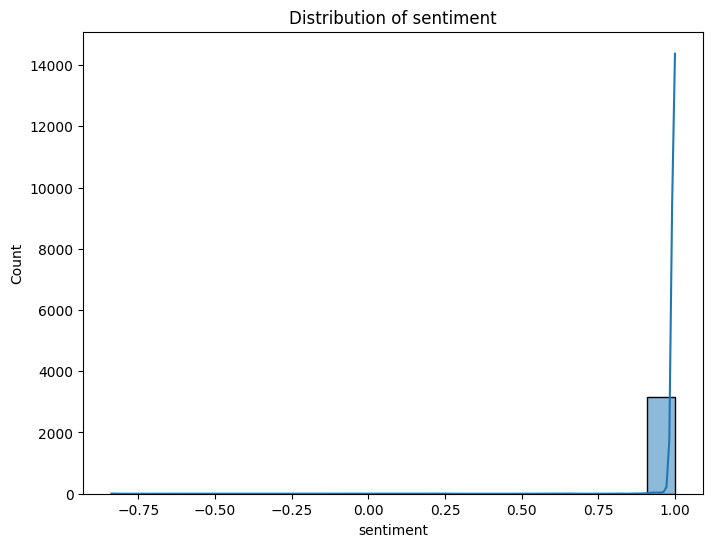

--- Summary of sentiment Distribution ---
   - Mean: 1.00
   - Median: 1.00
   - Standard Deviation: 0.04
   - The distribution of sentiment is negatively skewed.
   - sentiment appears to have a normal distribution.
   ----------------------------------------------------



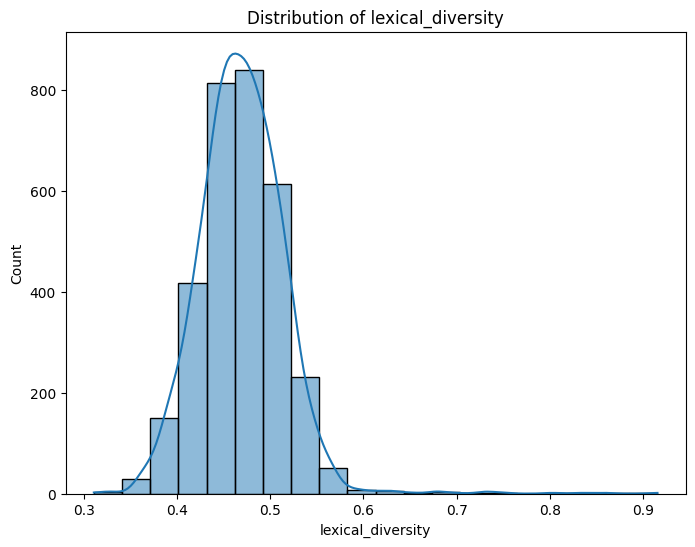

--- Summary of lexical_diversity Distribution ---
   - Mean: 0.47
   - Median: 0.47
   - Standard Deviation: 0.05
   - The distribution of lexical_diversity is positively skewed.
   - lexical_diversity appears to have a normal distribution.
   ----------------------------------------------------



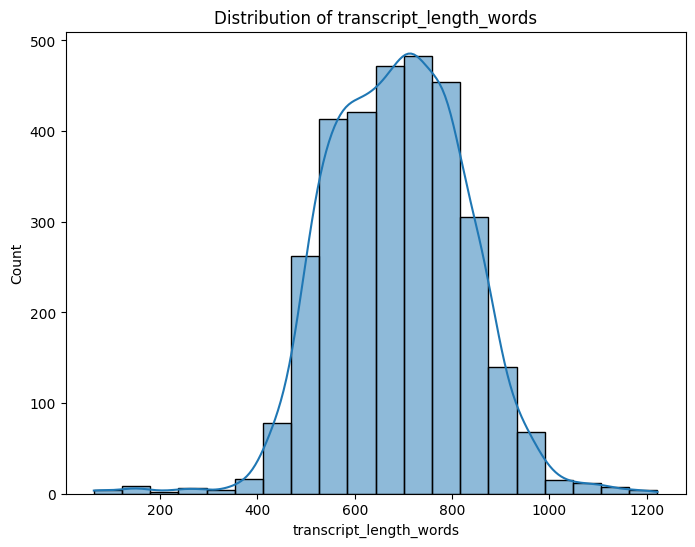

--- Summary of transcript_length_words Distribution ---
   - Mean: 687.27
   - Median: 688.00
   - Standard Deviation: 138.39
   - The distribution of transcript_length_words is negatively skewed.
   - transcript_length_words appears to have a skewed distribution.
   ----------------------------------------------------



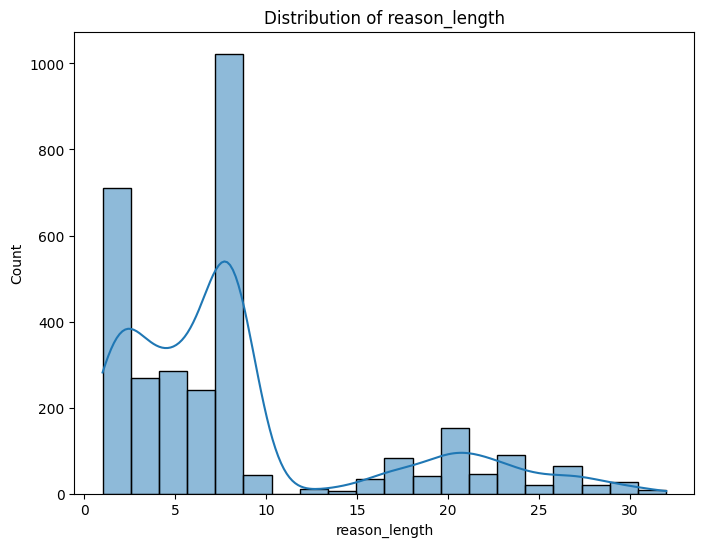

--- Summary of reason_length Distribution ---
   - Mean: 8.43
   - Median: 8.00
   - Standard Deviation: 7.02
   - The distribution of reason_length is positively skewed.
   - reason_length appears to have a skewed distribution.
   ----------------------------------------------------



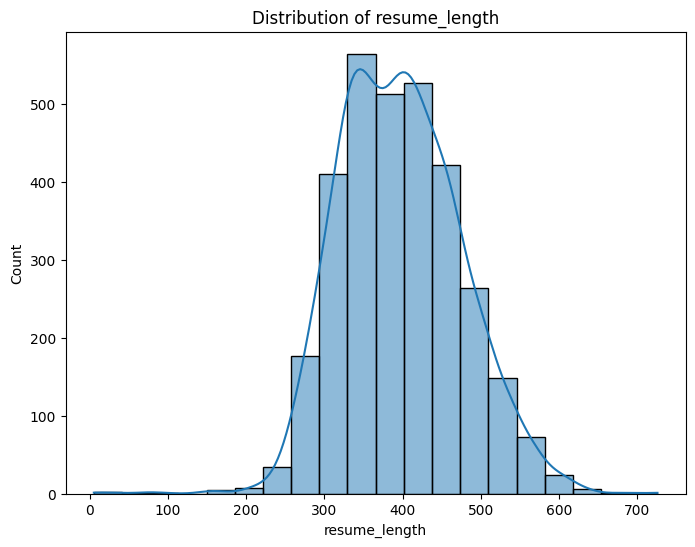

--- Summary of resume_length Distribution ---
   - Mean: 396.74
   - Median: 393.00
   - Standard Deviation: 77.06
   - The distribution of resume_length is positively skewed.
   - resume_length appears to have a skewed distribution.
   ----------------------------------------------------



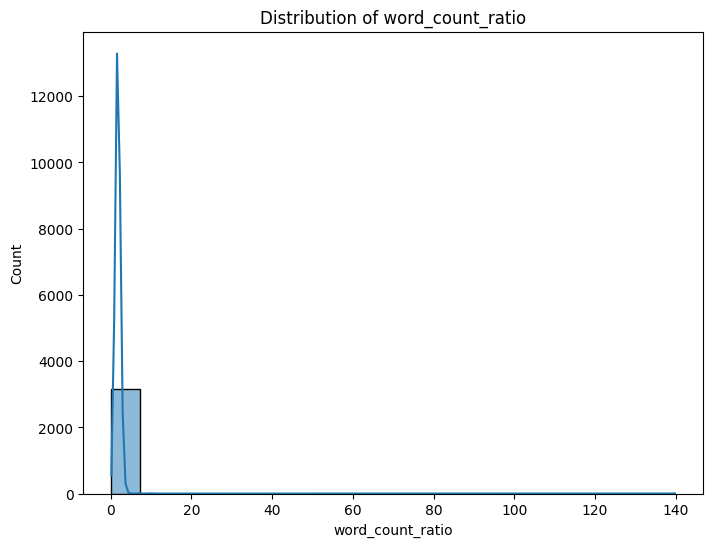

--- Summary of word_count_ratio Distribution ---
   - Mean: 1.82
   - Median: 1.74
   - Standard Deviation: 2.49
   - The distribution of word_count_ratio is positively skewed.
   - word_count_ratio appears to have a normal distribution.
   ----------------------------------------------------



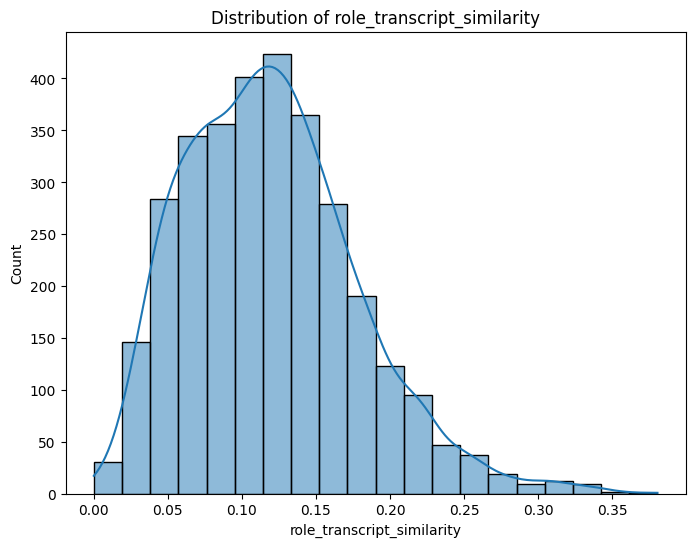

--- Summary of role_transcript_similarity Distribution ---
   - Mean: 0.12
   - Median: 0.12
   - Standard Deviation: 0.06
   - The distribution of role_transcript_similarity is positively skewed.
   - role_transcript_similarity appears to have a normal distribution.
   ----------------------------------------------------



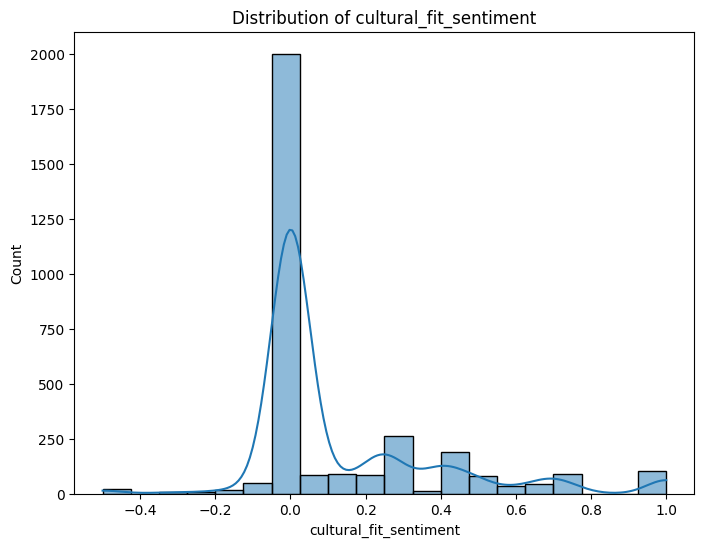

--- Summary of cultural_fit_sentiment Distribution ---
   - Mean: 0.13
   - Median: 0.00
   - Standard Deviation: 0.26
   - The distribution of cultural_fit_sentiment is positively skewed.
   - cultural_fit_sentiment appears to have a skewed distribution.
   ----------------------------------------------------



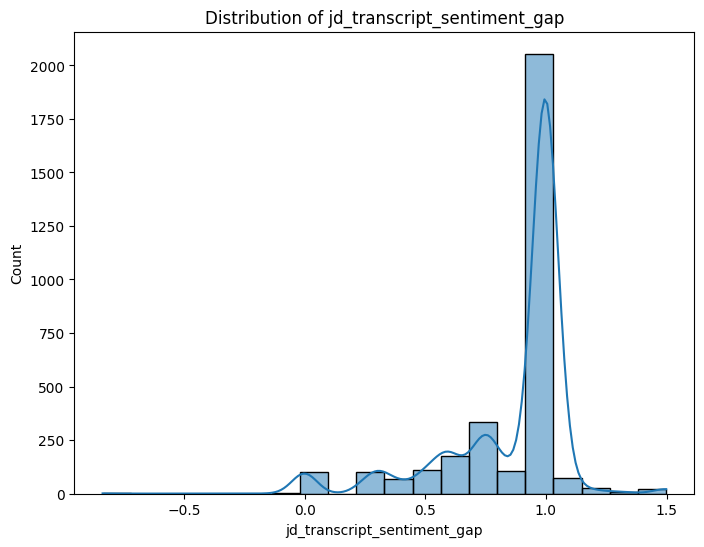

--- Summary of jd_transcript_sentiment_gap Distribution ---
   - Mean: 0.86
   - Median: 1.00
   - Standard Deviation: 0.26
   - The distribution of jd_transcript_sentiment_gap is negatively skewed.
   - jd_transcript_sentiment_gap appears to have a skewed distribution.
   ----------------------------------------------------



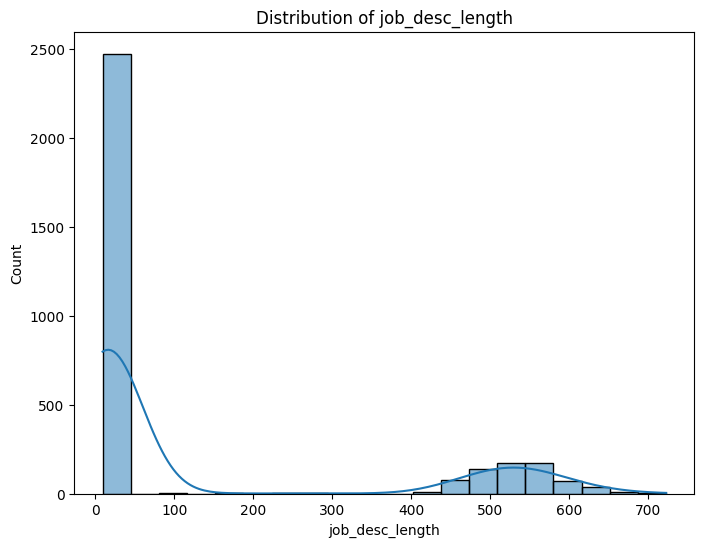

--- Summary of job_desc_length Distribution ---
   - Mean: 129.71
   - Median: 16.00
   - Standard Deviation: 215.33
   - The distribution of job_desc_length is positively skewed.
   - job_desc_length appears to have a skewed distribution.
   ----------------------------------------------------



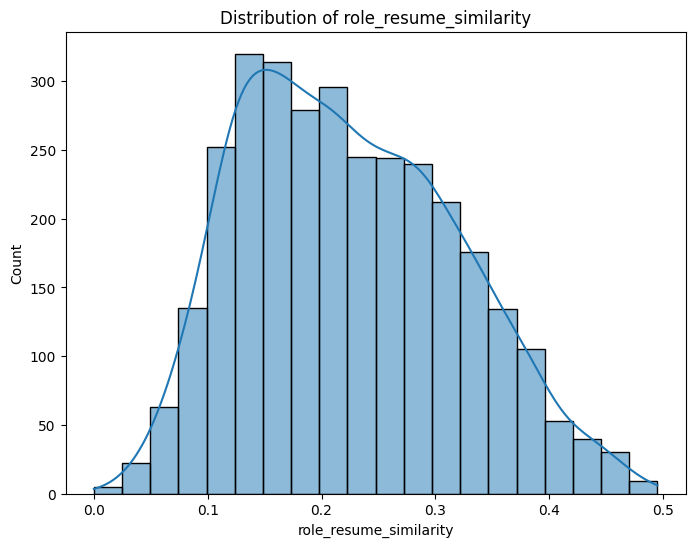

--- Summary of role_resume_similarity Distribution ---
   - Mean: 0.22
   - Median: 0.22
   - Standard Deviation: 0.09
   - The distribution of role_resume_similarity is positively skewed.
   - role_resume_similarity appears to have a normal distribution.
   ----------------------------------------------------



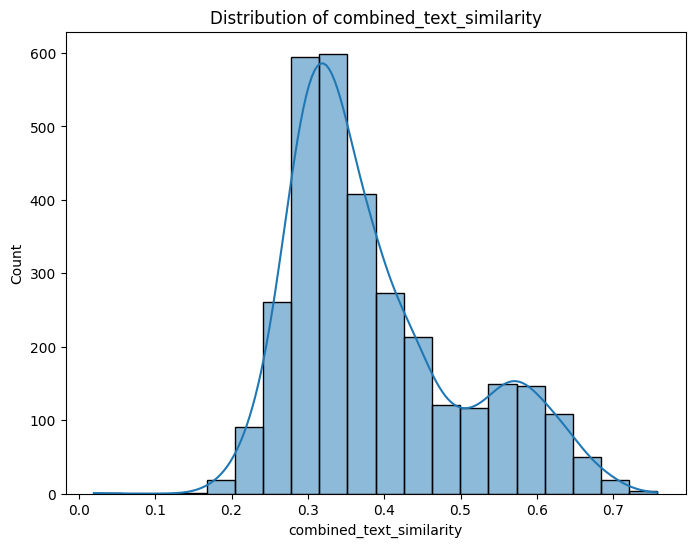

--- Summary of combined_text_similarity Distribution ---
   - Mean: 0.39
   - Median: 0.35
   - Standard Deviation: 0.11
   - The distribution of combined_text_similarity is positively skewed.
   - combined_text_similarity appears to have a normal distribution.
   ----------------------------------------------------



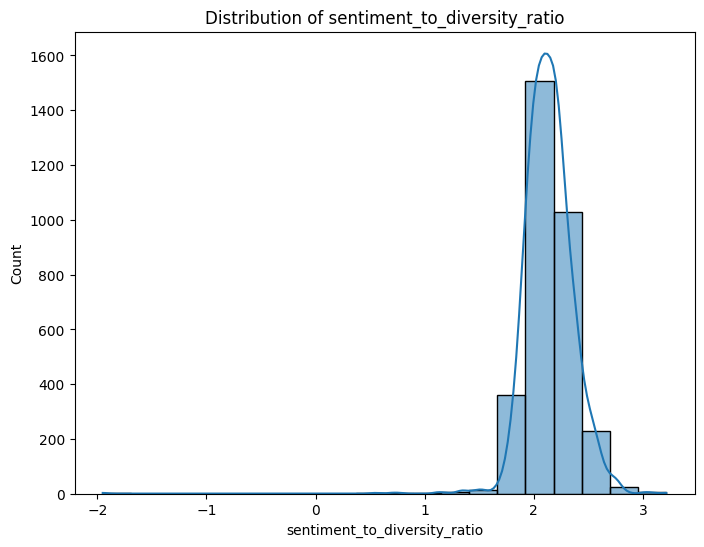

--- Summary of sentiment_to_diversity_ratio Distribution ---
   - Mean: 2.14
   - Median: 2.13
   - Standard Deviation: 0.22
   - The distribution of sentiment_to_diversity_ratio is positively skewed.
   - sentiment_to_diversity_ratio appears to have a normal distribution.
   ----------------------------------------------------



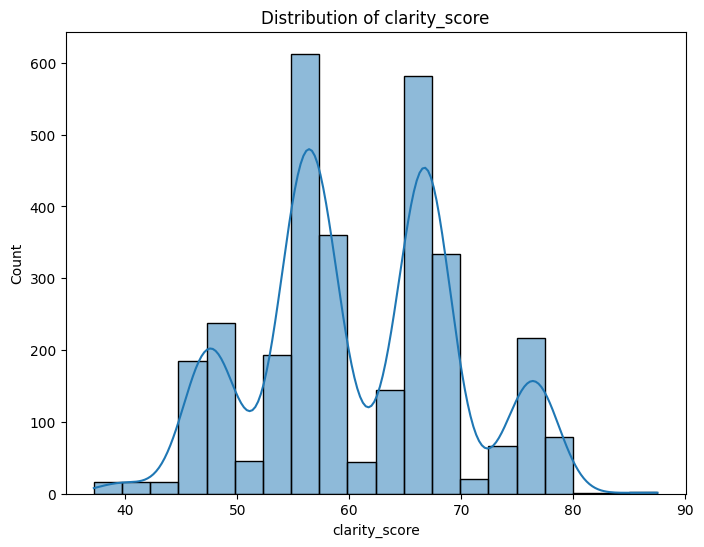

--- Summary of clarity_score Distribution ---
   - Mean: 60.76
   - Median: 58.69
   - Standard Deviation: 8.96
   - The distribution of clarity_score is positively skewed.
   - clarity_score appears to have a skewed distribution.
   ----------------------------------------------------



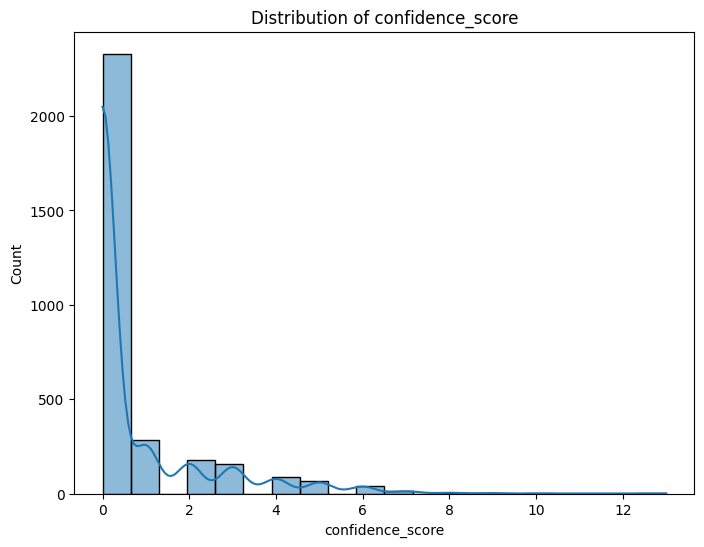

--- Summary of confidence_score Distribution ---
   - Mean: 0.71
   - Median: 0.00
   - Standard Deviation: 1.48
   - The distribution of confidence_score is positively skewed.
   - confidence_score appears to have a skewed distribution.
   ----------------------------------------------------



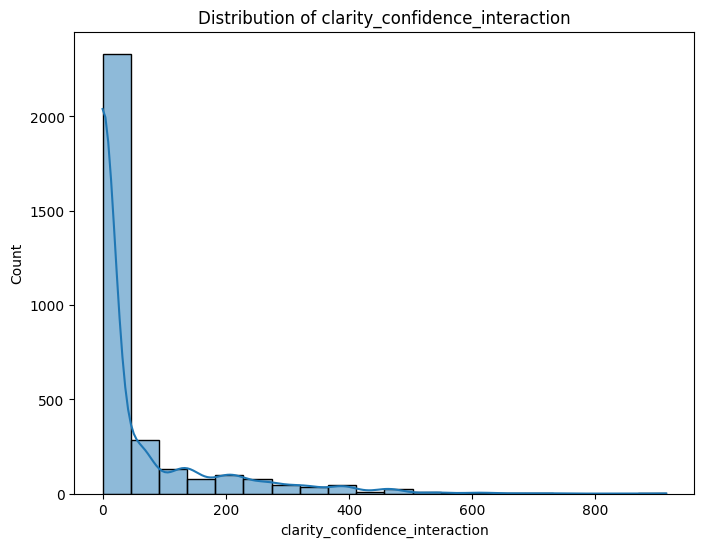

--- Summary of clarity_confidence_interaction Distribution ---
   - Mean: 48.30
   - Median: 0.00
   - Standard Deviation: 104.96
   - The distribution of clarity_confidence_interaction is positively skewed.
   - clarity_confidence_interaction appears to have a skewed distribution.
   ----------------------------------------------------



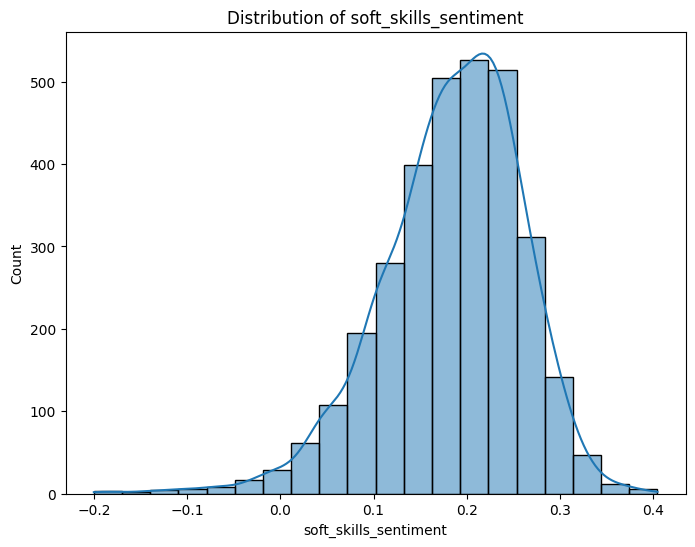

--- Summary of soft_skills_sentiment Distribution ---
   - Mean: 0.18
   - Median: 0.19
   - Standard Deviation: 0.08
   - The distribution of soft_skills_sentiment is negatively skewed.
   - soft_skills_sentiment appears to have a normal distribution.
   ----------------------------------------------------



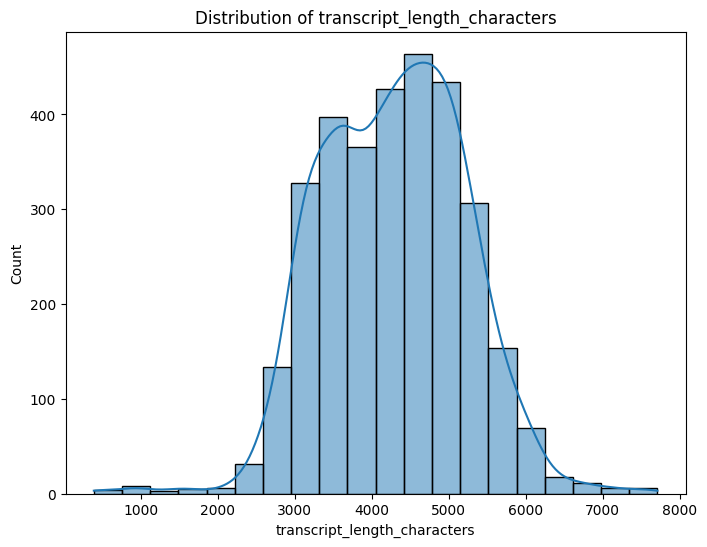

--- Summary of transcript_length_characters Distribution ---
   - Mean: 4286.39
   - Median: 4310.00
   - Standard Deviation: 926.49
   - The distribution of transcript_length_characters is negatively skewed.
   - transcript_length_characters appears to have a skewed distribution.
   ----------------------------------------------------



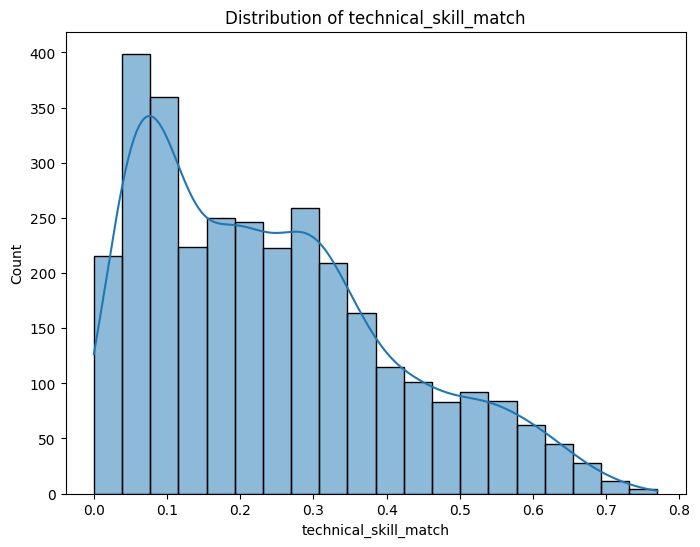

--- Summary of technical_skill_match Distribution ---
   - Mean: 0.24
   - Median: 0.21
   - Standard Deviation: 0.17
   - The distribution of technical_skill_match is positively skewed.
   - technical_skill_match appears to have a normal distribution.
   ----------------------------------------------------



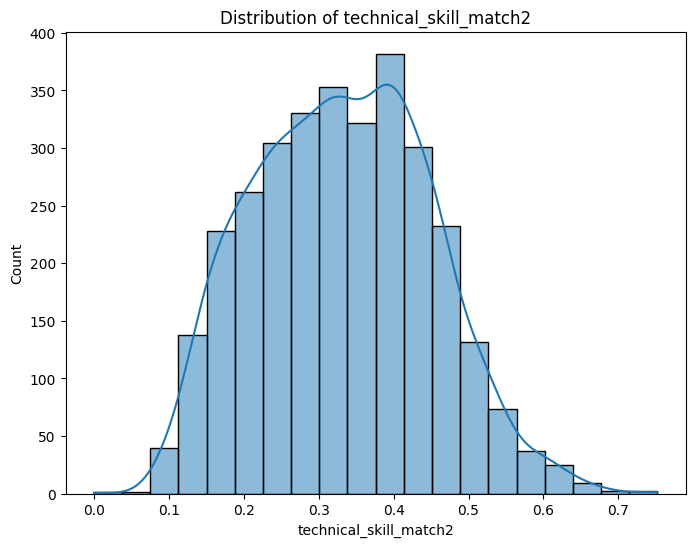

--- Summary of technical_skill_match2 Distribution ---
   - Mean: 0.33
   - Median: 0.33
   - Standard Deviation: 0.12
   - The distribution of technical_skill_match2 is positively skewed.
   - technical_skill_match2 appears to have a normal distribution.
   ----------------------------------------------------



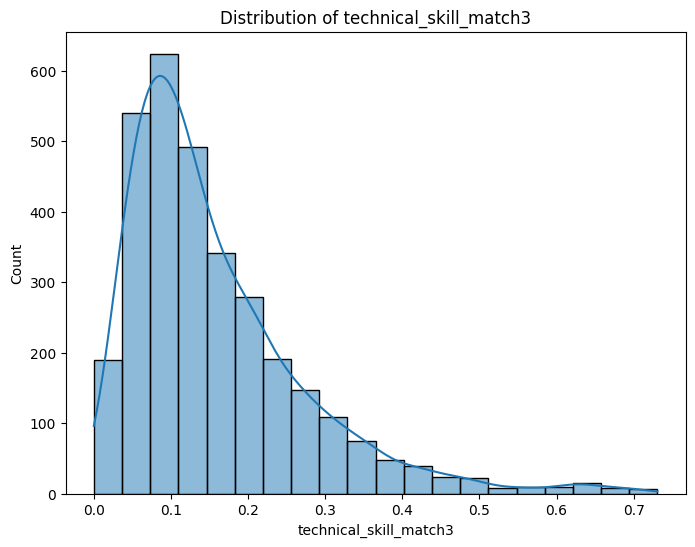

--- Summary of technical_skill_match3 Distribution ---
   - Mean: 0.16
   - Median: 0.12
   - Standard Deviation: 0.12
   - The distribution of technical_skill_match3 is positively skewed.
   - technical_skill_match3 appears to have a normal distribution.
   ----------------------------------------------------



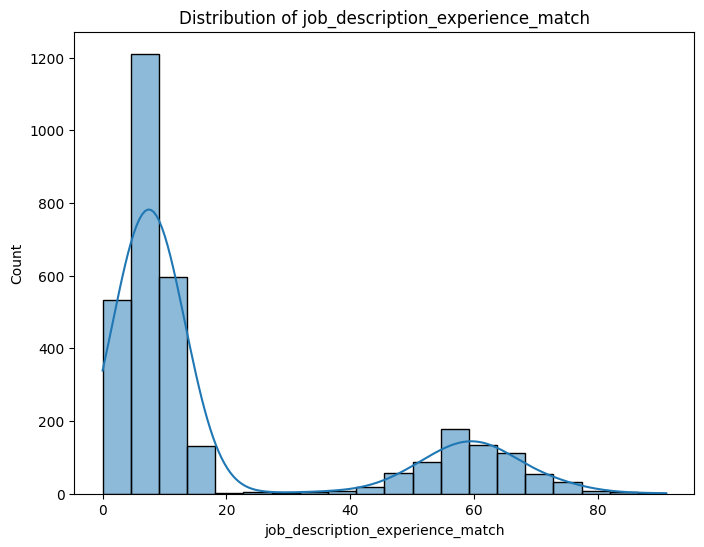

--- Summary of job_description_experience_match Distribution ---
   - Mean: 18.94
   - Median: 9.00
   - Standard Deviation: 22.12
   - The distribution of job_description_experience_match is positively skewed.
   - job_description_experience_match appears to have a skewed distribution.
   ----------------------------------------------------



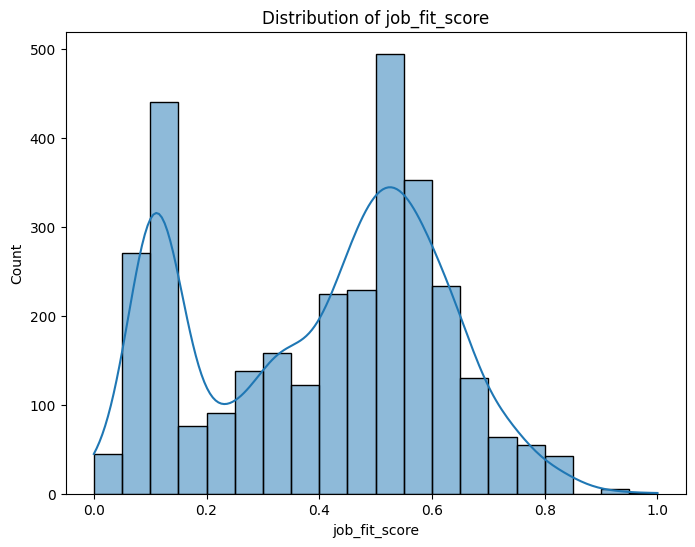

--- Summary of job_fit_score Distribution ---
   - Mean: 0.40
   - Median: 0.45
   - Standard Deviation: 0.21
   - The distribution of job_fit_score is negatively skewed.
   - job_fit_score appears to have a normal distribution.
   ----------------------------------------------------



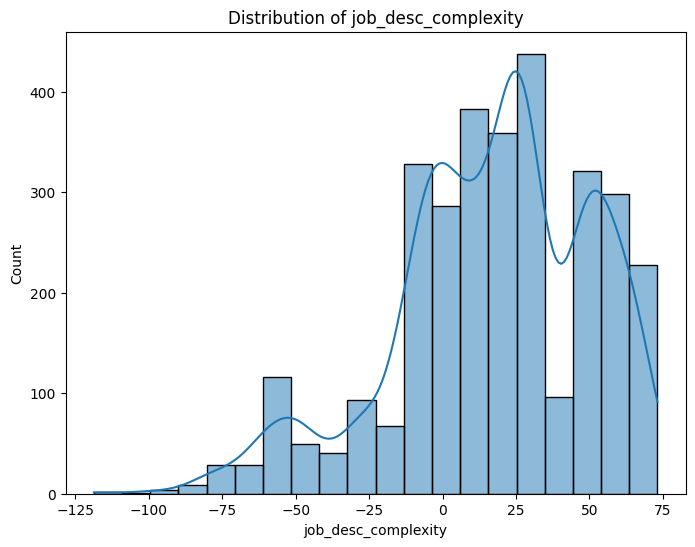

--- Summary of job_desc_complexity Distribution ---
   - Mean: 16.79
   - Median: 22.11
   - Standard Deviation: 33.63
   - The distribution of job_desc_complexity is negatively skewed.
   - job_desc_complexity appears to have a skewed distribution.
   ----------------------------------------------------



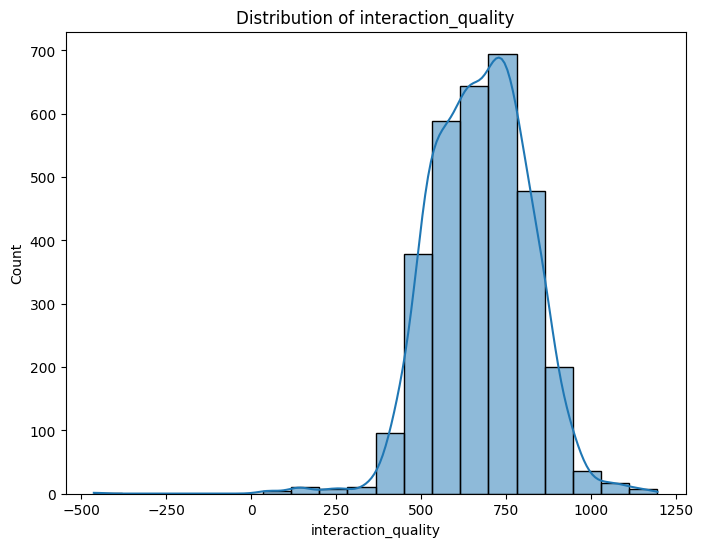

--- Summary of interaction_quality Distribution ---
   - Mean: 674.36
   - Median: 677.01
   - Standard Deviation: 142.24
   - The distribution of interaction_quality is negatively skewed.
   - interaction_quality appears to have a skewed distribution.
   ----------------------------------------------------



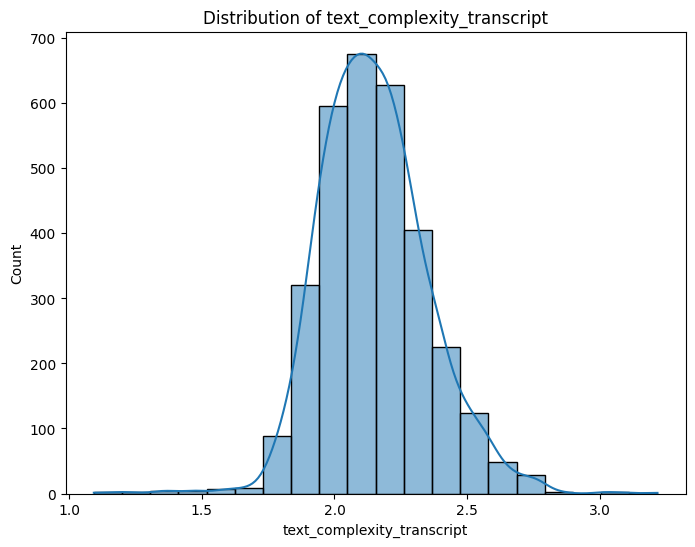

--- Summary of text_complexity_transcript Distribution ---
   - Mean: 2.15
   - Median: 2.13
   - Standard Deviation: 0.20
   - The distribution of text_complexity_transcript is positively skewed.
   - text_complexity_transcript appears to have a normal distribution.
   ----------------------------------------------------



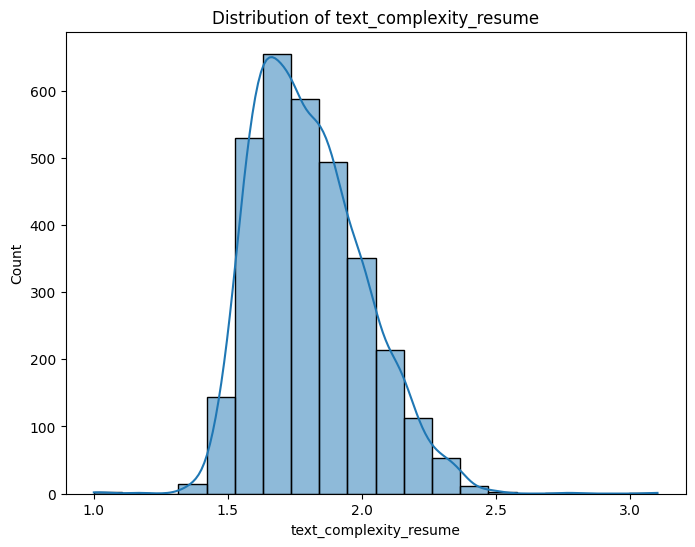

--- Summary of text_complexity_resume Distribution ---
   - Mean: 1.80
   - Median: 1.77
   - Standard Deviation: 0.20
   - The distribution of text_complexity_resume is positively skewed.
   - text_complexity_resume appears to have a normal distribution.
   ----------------------------------------------------



In [37]:
# List of numerical features to analyze
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = ['num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words', 'reason_length',
       'resume_length', 'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume']

# Loop through each feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=20)  # Create histogram with KDE curve
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    # Summary of the plot
    print(f"--- Summary of {feature} Distribution ---")
    # Analyze the feature's distribution
    feature_data = data[feature]
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    std_value = feature_data.std()
    
    print(f"   - Mean: {mean_value:.2f}")
    print(f"   - Median: {median_value:.2f}")
    print(f"   - Standard Deviation: {std_value:.2f}")
    
    # Insights based on distribution (adjust based on the feature type)
    if mean_value > median_value:
        print(f"   - The distribution of {feature} is positively skewed.")
    elif mean_value < median_value:
        print(f"   - The distribution of {feature} is negatively skewed.")
    else:
        print(f"   - The distribution of {feature} is symmetric.")
    
    print(f"   - {feature} appears to have a {'normal' if abs(mean_value - median_value) < 0.1 else 'skewed'} distribution.")
    print("   ----------------------------------------------------\n")


In [38]:
#Select features for model training (removed the removed features)
X = data[[
    'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words', 'reason_length',
       'resume_length', 'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume']
]

y = data['decision']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 89.13%


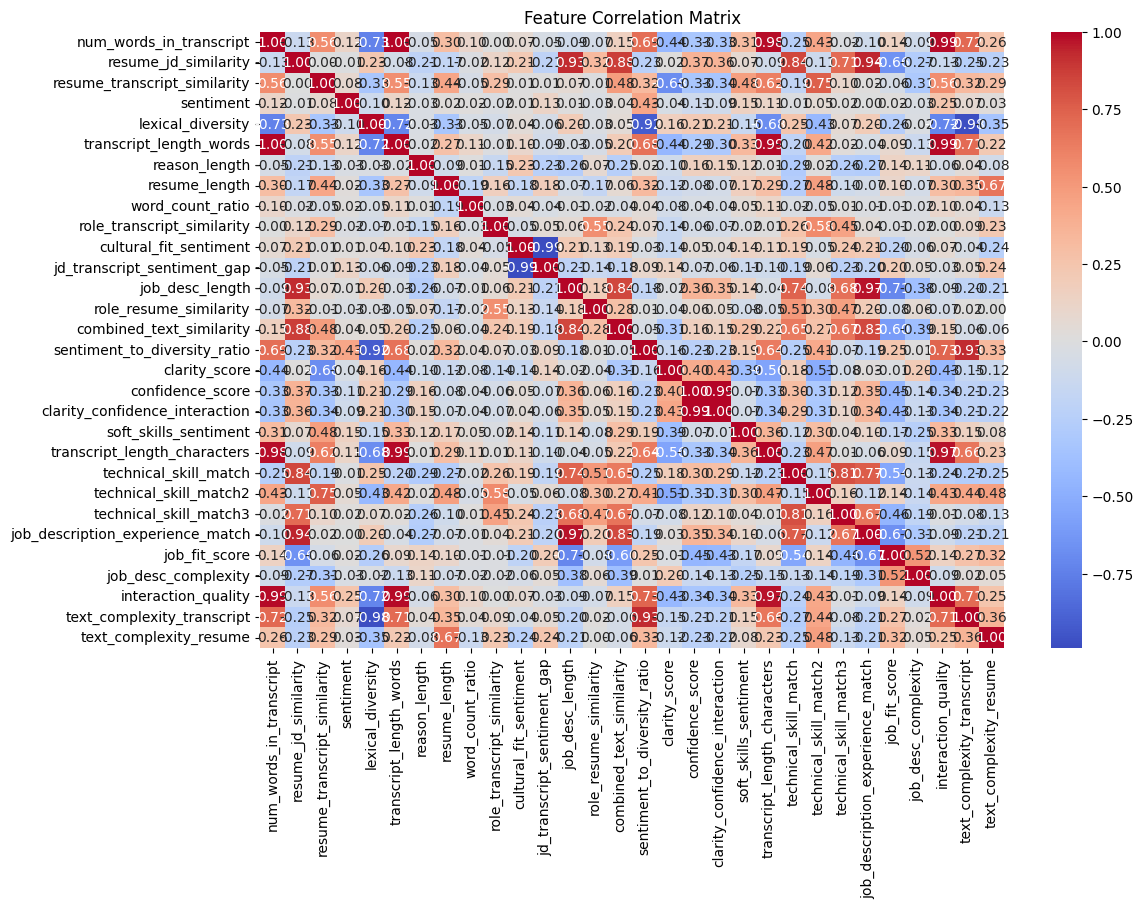

In [42]:
# Calculate the correlation matrix
corr_matrix = X.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

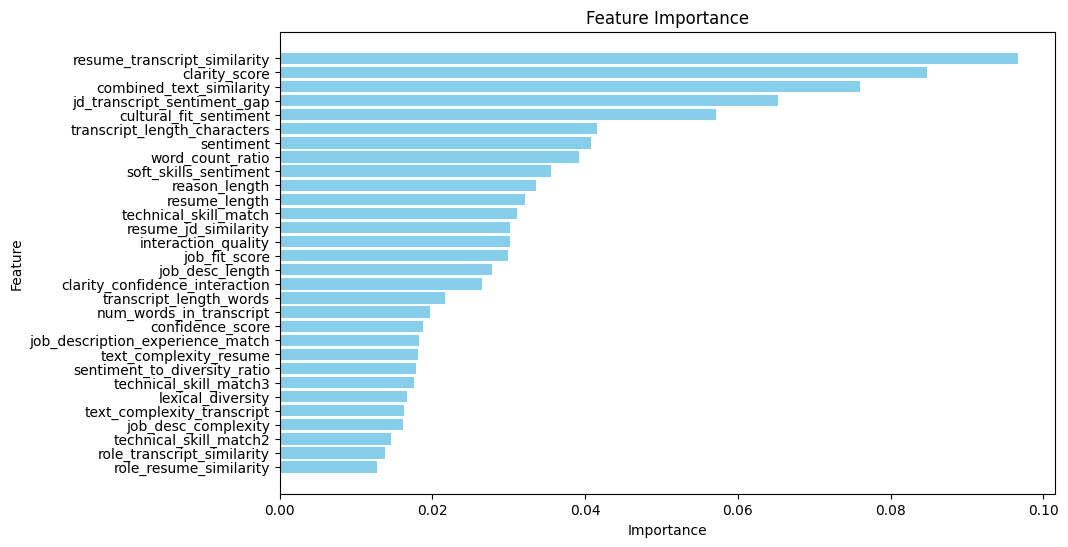


--- Feature Importance Summary ---
Top 5 most important features:
                         Feature  Importance
2   resume_transcript_similarity    0.096660
16                 clarity_score    0.084797
14      combined_text_similarity    0.075986
11   jd_transcript_sentiment_gap    0.065243
10        cultural_fit_sentiment    0.057125

Bottom 5 least important features:
                       Feature  Importance
28  text_complexity_transcript    0.016210
26         job_desc_complexity    0.016111
22      technical_skill_match2    0.014625
9   role_transcript_similarity    0.013740
13      role_resume_similarity    0.012788


In [43]:
# Get the feature importances from the trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

# Sort the features based on their importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Summary of the plot
# Display the top 5 most and least important features
print("\n--- Feature Importance Summary ---")
top_5_features = feature_importances.head(5)
bottom_5_features = feature_importances.tail(5)

print("Top 5 most important features:")
print(top_5_features[['Feature', 'Importance']])

print("\nBottom 5 least important features:")
print(bottom_5_features[['Feature', 'Importance']])


In [44]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_curve, auc

# Add a constant to the features for the intercept term
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train_const).fit()

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test_const)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_roc_auc = auc(fpr, tpr)

# Output performance
print(f"\nLogistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Logistic Regression AUC: {log_reg_roc_auc:.4f}")


Optimization terminated successfully.
         Current function value: 0.337738
         Iterations 11

Logistic Regression Accuracy: 81.57%
Logistic Regression AUC: 0.9078


In [45]:
# --- Error Analysis ---
error_analysis = X_test.copy()
error_analysis['True Label'] = y_test
error_analysis['Predicted Label'] = y_pred_binary
error_analysis['Error'] = error_analysis['True Label'] != error_analysis['Predicted Label']  # Flag errors

# Display misclassified samples
misclassified_samples = error_analysis[error_analysis['Error']]
total_misclassified = f"misclassified instances: {len(misclassified_samples)}"
total_misclassified # Display the first few misclassified instances



'misclassified instances: 117'

In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Fit the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Calculate feature importance based on coefficients
lin_reg_feature_importance = abs(lin_reg_model.coef_)  # Use absolute values of coefficients
lin_reg_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lin_reg_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (Linear Regression):")
lin_reg_impact_analysis


Impact Analysis (Linear Regression):


Feature  Importance
28        text_complexity_transcript    1.945086
2       resume_transcript_similarity    1.416258
15      sentiment_to_diversity_ratio    1.332890
22            technical_skill_match2    1.242723
14          combined_text_similarity    0.985239
4                  lexical_diversity    0.615687
1               resume_jd_similarity    0.554220
9         role_transcript_similarity    0.487857
11       jd_transcript_sentiment_gap    0.485393
3                          sentiment    0.414895
25                     job_fit_score    0.362963
19             soft_skills_sentiment    0.212414
17                  confidence_score    0.149283
23            technical_skill_match3    0.136820
13            role_resume_similarity    0.123061
10            cultural_fit_sentiment    0.070498
29            text_complexity_resume    0.054552
21             technical_skill_match    0.033956
0            num_words_in_transcript    0.015440
5            transcript_length_words    0.010500
6                      reason_length    0.009617
16                     clarity_score    0.005218
27               interaction_quality    0.004485
24  job_description_experience_match    0.004417
8                   word_count_ratio    0.002433
18    clarity_confidence_interaction    0.001335
7                      resume_length    0.001189
12                   job_desc_length    0.000454
26               job_desc_complexity    0.000407
20      transcript_length_characters    0.000112

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Decision Tree Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',  # Change to 'roc_auc' if optimizing for AUC in binary classification
    verbose=1,  # Optional: Add verbosity to monitor progress
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and evaluate
dt_best = grid_search.best_estimator_
dt_y_pred = dt_best.predict(X_test)

# For binary classification: Predict probabilities for ROC AUC calculation
if len(set(y_test)) == 2:  # Binary classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])
else:  # Multi-class classification
    dt_roc_auc = roc_auc_score(y_test, dt_best.predict_proba(X_test), multi_class='ovr')

dt_accuracy = accuracy_score(y_test, dt_y_pred)

# Display results
print(f"Decision Tree Accuracy: {dt_accuracy* 100:.2f}")
print(f"Decision Tree ROC AUC: {dt_roc_auc:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree Accuracy: 85.83
Decision Tree ROC AUC: 0.8917


In [48]:
# --- Error Analysis ---
dt_errors = X_test.copy() 
dt_errors['True Label'] = y_test  
dt_errors['Predicted Label'] = dt_best.predict(X_test)  
dt_errors['Error'] = dt_errors['True Label'] != dt_errors['Predicted Label'] 

# Extract misclassified samples
misclassified_dt = dt_errors[dt_errors['Error'] == True]

# Display the first few misclassified instances
print("Misclassified Instances:",len(misclassified_dt))

Misclassified Instances: 90


In [49]:
# --- Impact Analysis (Decision Tree) ---
dt_feature_importance = dt_best.feature_importances_  # Extract feature importances
dt_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Displaying feature importance
print("Impact Analysis (Decision Tree):")
dt_impact_analysis



Impact Analysis (Decision Tree):


Feature  Importance
16                     clarity_score    0.296130
6                      reason_length    0.103411
11       jd_transcript_sentiment_gap    0.079484
8                   word_count_ratio    0.079399
14          combined_text_similarity    0.068126
2       resume_transcript_similarity    0.063427
10            cultural_fit_sentiment    0.054039
20      transcript_length_characters    0.039326
12                   job_desc_length    0.030845
24  job_description_experience_match    0.020144
27               interaction_quality    0.016969
1               resume_jd_similarity    0.016336
7                      resume_length    0.015961
25                     job_fit_score    0.014611
21             technical_skill_match    0.012838
29            text_complexity_resume    0.012436
18    clarity_confidence_interaction    0.012283
13            role_resume_similarity    0.010134
19             soft_skills_sentiment    0.008764
26               job_desc_complexity    0.008707
3                          sentiment    0.008058
28        text_complexity_transcript    0.007682
15      sentiment_to_diversity_ratio    0.006751
23            technical_skill_match3    0.005910
9         role_transcript_similarity    0.004465
0            num_words_in_transcript    0.001605
5            transcript_length_words    0.001368
4                  lexical_diversity    0.000791
22            technical_skill_match2    0.000000
17                  confidence_score    0.000000

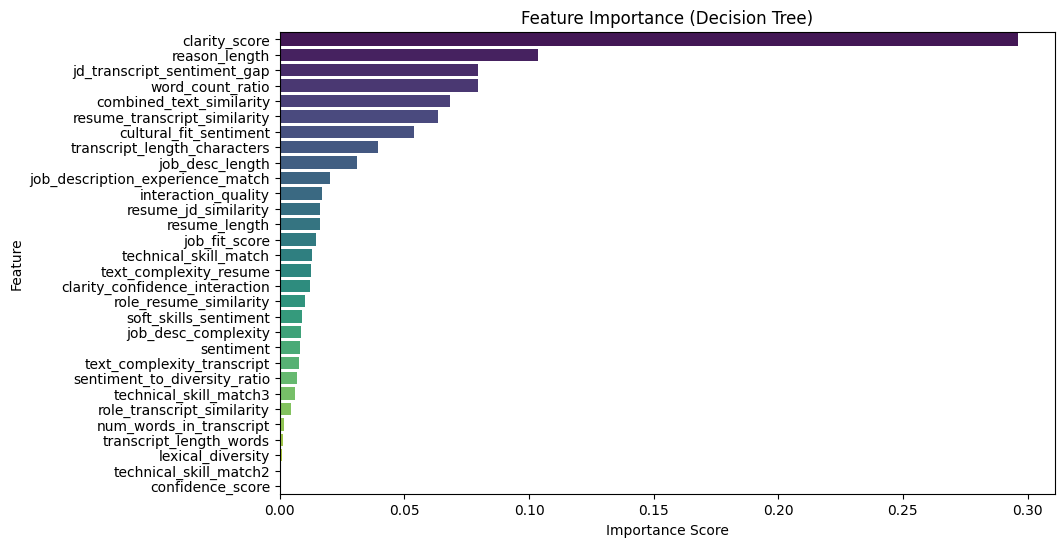


Top 5 most impactful features:
clarity_score: Importance = 0.2961
reason_length: Importance = 0.1034
jd_transcript_sentiment_gap: Importance = 0.0795
word_count_ratio: Importance = 0.0794
combined_text_similarity: Importance = 0.0681


In [50]:
# Select the top 5 most impactful features
top_dt_features = dt_impact_analysis.head(5)

# --- Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=dt_impact_analysis,
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.legend([], [], frameon=False)  # Remove legend for cleaner output
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# --- Summary ---
print("\nTop 5 most impactful features:")
for i, row in top_dt_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV

# Example dataset (replace these with actual data)
# X_train, X_test, y_train, y_test = <your_data_split>

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],  # Reduced grid for faster search
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest with parallel processing
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform grid search with cross-validation
print("Starting Random Forest Grid Search...")
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1)  # Using 'roc_auc' as the scoring metric
grid_search.fit(X_train, y_train)

# Best model from GridSearch
rf_best = grid_search.best_estimator_

# Predictions on test set
rf_y_pred = rf_best.predict(X_test)

# Predict probabilities for ROC-AUC
rf_y_prob = rf_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)

# Display results
print(f"Random Forest Accuracy: {rf_accuracy*100:.4f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")


Starting Random Forest Grid Search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest Accuracy: 87.8740
Random Forest ROC-AUC: 0.9700


In [52]:
# Error Analysis
rf_errors = X_test.copy()
rf_errors['True Label'] = y_test
rf_errors['Predicted Label'] = rf_best.predict(X_test)
rf_errors['Error'] = rf_errors['True Label'] != rf_errors['Predicted Label']

# Check if there are any misclassified instances
if not rf_errors['Error'].any():
    print("No misclassified instances found in the test set.")
else:
    # Display the first few misclassified instances
    misclassified_rf = rf_errors[rf_errors['Error']]
    print(f"Total Misclassified Instances: {len(misclassified_rf)}")

Total Misclassified Instances: 77


In [53]:
# Impact Analysis (using feature importances)
rf_feature_importance = rf_best.feature_importances_
rf_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying the top 10 most impactful features
print("Impact Analysis (Random Forest):")
rf_impact_analysis

Impact Analysis (Random Forest):


Feature  Importance
16                     clarity_score    0.124302
2       resume_transcript_similarity    0.099266
11       jd_transcript_sentiment_gap    0.072854
10            cultural_fit_sentiment    0.066526
14          combined_text_similarity    0.061622
3                          sentiment    0.051299
8                   word_count_ratio    0.043328
20      transcript_length_characters    0.040943
6                      reason_length    0.038508
7                      resume_length    0.033823
12                   job_desc_length    0.030005
19             soft_skills_sentiment    0.029538
27               interaction_quality    0.027508
1               resume_jd_similarity    0.027061
25                     job_fit_score    0.026617
18    clarity_confidence_interaction    0.023071
21             technical_skill_match    0.022274
0            num_words_in_transcript    0.019241
5            transcript_length_words    0.018421
28        text_complexity_transcript    0.016331
24  job_description_experience_match    0.014888
17                  confidence_score    0.014846
4                  lexical_diversity    0.014029
26               job_desc_complexity    0.013920
23            technical_skill_match3    0.013615
15      sentiment_to_diversity_ratio    0.013350
29            text_complexity_resume    0.013279
22            technical_skill_match2    0.011245
13            role_resume_similarity    0.009370
9         role_transcript_similarity    0.008919

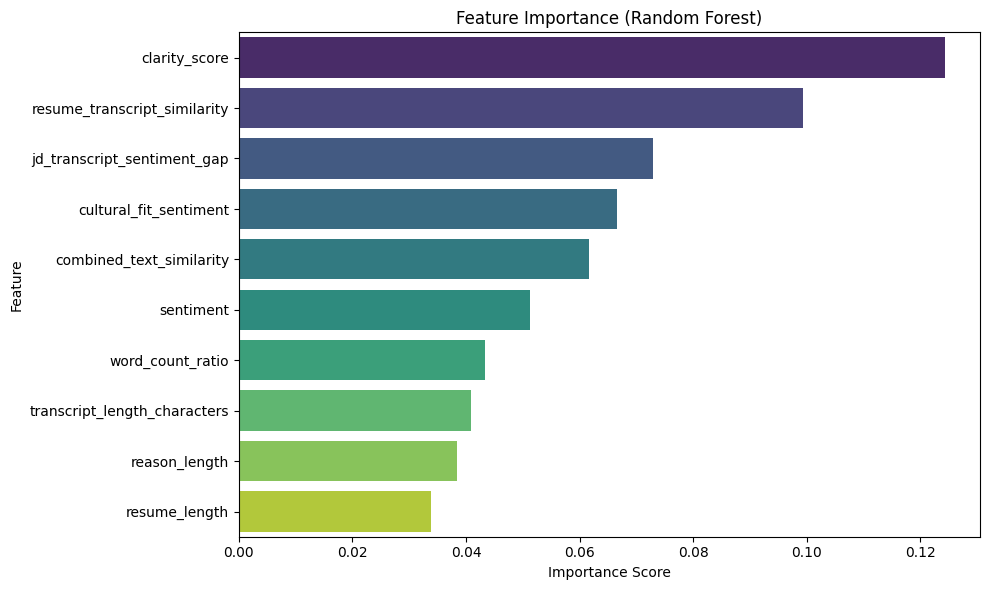

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=rf_impact_analysis.head(10), 
    palette='viridis',
    hue='Feature',  # Assign the `Feature` column to `hue`
    dodge=False  # Prevent stacking of bars (as there's no grouping here)
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [55]:
#XGBoost
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# XGBoost Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],               # Tree depth
    'learning_rate': [0.01, 0.1, 0.3],   # Step size shrinkage
    'n_estimators': [50, 100, 150]       # Number of boosting rounds
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
xgb_best = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions
xgb_y_pred = xgb_best.predict(X_test)
xgb_y_pred_prob = xgb_best.predict_proba(X_test)[:, 1]

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_prob)

# Display the results
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(f"XGBoost ROC AUC: {xgb_roc_auc:.4f}")

XGBoost Accuracy: 88.50%
XGBoost ROC AUC: 0.9707


In [56]:
# Error Analysis
xgb_errors = X_test.copy()
xgb_errors['True Label'] = y_test
xgb_errors['Predicted Label'] = xgb_best.predict(X_test)
xgb_errors['Error'] = xgb_errors['True Label'] != xgb_errors['Predicted Label']

# Display a few misclassified instances
misclassified_xgb = xgb_errors[xgb_errors['Error']]
print(f"Misclassified Instances:{len(misclassified_xgb)}")


Misclassified Instances:73


In [ ]:
# Impact Analysis (using feature importances)
xgb_feature_importance = xgb_best.get_booster().get_score(importance_type='weight')
xgb_impact_analysis = pd.DataFrame(
    list(xgb_feature_importance.items()), columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# Displaying impact
print("Impact Analysis (XGBoost):")
xgb_impact_analysis


Impact Analysis (XGBoost):


Feature  Importance
16                     clarity_score       129.0
18             soft_skills_sentiment       120.0
14          combined_text_similarity       111.0
20             technical_skill_match       111.0
24                     job_fit_score       106.0
19      transcript_length_characters       103.0
13            role_resume_similarity       103.0
2       resume_transcript_similarity       102.0
7                      resume_length       101.0
11       jd_transcript_sentiment_gap        95.0
3                          sentiment        92.0
8                   word_count_ratio        84.0
1               resume_jd_similarity        82.0
21            technical_skill_match2        82.0
28            text_complexity_resume        78.0
9         role_transcript_similarity        73.0
4                  lexical_diversity        70.0
22            technical_skill_match3        66.0
25               job_desc_complexity        65.0
15      sentiment_to_diversity_ratio        56.0
6                      reason_length        51.0
12                   job_desc_length        50.0
10            cultural_fit_sentiment        49.0
5            transcript_length_words        40.0
0            num_words_in_transcript        40.0
26               interaction_quality        36.0
23  job_description_experience_match        34.0
17    clarity_confidence_interaction        30.0
27        text_complexity_transcript        16.0

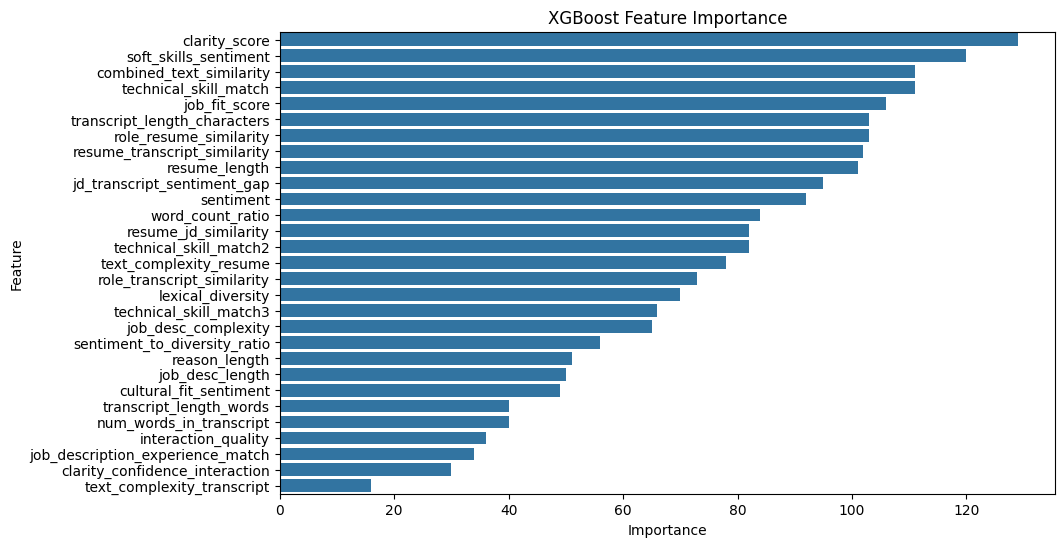

Top 5 most impactful features:
clarity_score: Importance = 129.0000
soft_skills_sentiment: Importance = 120.0000
combined_text_similarity: Importance = 111.0000
technical_skill_match: Importance = 111.0000
job_fit_score: Importance = 106.0000


In [58]:
# --- XGBoost Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_impact_analysis)
plt.title('XGBoost Feature Importance')
plt.show()

# --- Summary ---
top_xgb_features = xgb_impact_analysis.head(5)  # Top 5 features by importance

print("Top 5 most impactful features:")
for i, row in top_xgb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [59]:
# --- Gradient Boosting Classifier ---
from sklearn.ensemble import GradientBoostingClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Initialize and fit the model using GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and predictions
gb_best = grid_search.best_estimator_
gb_y_pred = gb_best.predict(X_test)

# Evaluation metrics
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])

# Display results
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Gradient Boosting ROC AUC: {gb_roc_auc:.4f}")

Gradient Boosting Accuracy: 88.98%
Gradient Boosting ROC AUC: 0.9717


In [60]:
# --- Error Analysis for Gradient Boosting ---
gb_errors = X_test.copy()
gb_errors['True Label'] = y_test
gb_errors['Predicted Label'] = gb_y_pred  # Use predictions from Gradient Boosting
gb_errors['Error'] = gb_errors['True Label'] != gb_errors['Predicted Label']

# Extracting misclassified instances
misclassified_gb = gb_errors[gb_errors['Error']]
print(f"Misclassified Instances: {len(misclassified_gb)}")


Misclassified Instances: 70


In [61]:
# --- Impact Analysis for Gradient Boosting ---
gb_feature_importance = gb_best.feature_importances_
gb_impact_analysis = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_importance
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the impact analysis
print("Impact Analysis (Gradient Boosting):")
gb_impact_analysis


Impact Analysis (Gradient Boosting):


Feature  Importance
0                      clarity_score    0.268300
1                      reason_length    0.091847
2        jd_transcript_sentiment_gap    0.084888
3                   word_count_ratio    0.078595
4           combined_text_similarity    0.057152
5       resume_transcript_similarity    0.053465
6             cultural_fit_sentiment    0.048972
7                    job_desc_length    0.033975
8       transcript_length_characters    0.032787
9   job_description_experience_match    0.021598
10                         sentiment    0.021267
11                     job_fit_score    0.020524
12             soft_skills_sentiment    0.020152
13               interaction_quality    0.017638
14                     resume_length    0.014893
15             technical_skill_match    0.014362
16            text_complexity_resume    0.014318
17    clarity_confidence_interaction    0.013788
18        text_complexity_transcript    0.010856
19            technical_skill_match3    0.010586
20            role_resume_similarity    0.009623
21            technical_skill_match2    0.008652
22                 lexical_diversity    0.008648
23        role_transcript_similarity    0.008568
24              resume_jd_similarity    0.008052
25               job_desc_complexity    0.007435
26      sentiment_to_diversity_ratio    0.006446
27           num_words_in_transcript    0.006160
28           transcript_length_words    0.004014
29                  confidence_score    0.002437

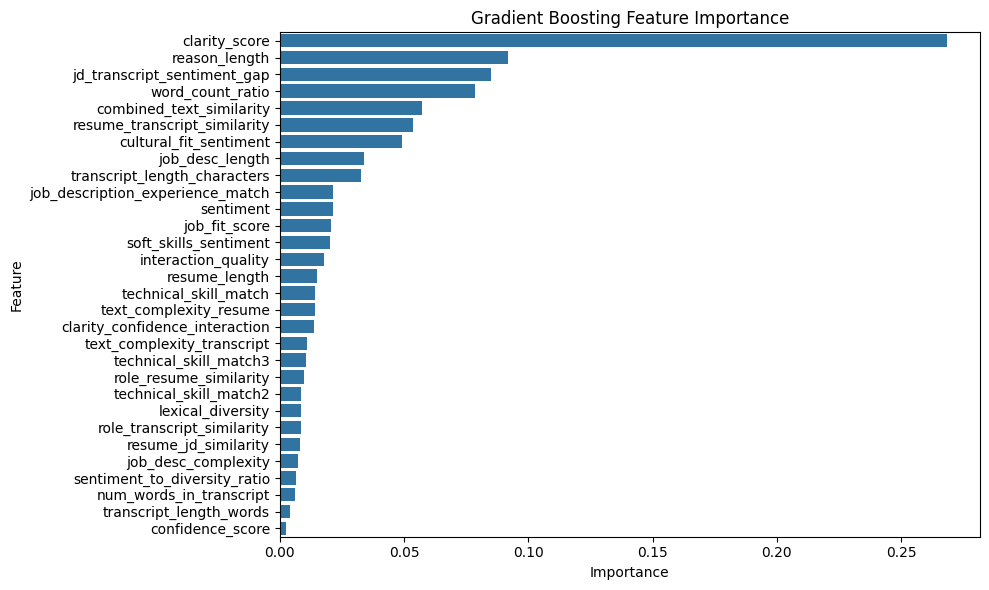


Top 5 most impactful features:
clarity_score: Importance = 0.2683
reason_length: Importance = 0.0918
jd_transcript_sentiment_gap: Importance = 0.0849
word_count_ratio: Importance = 0.0786
combined_text_similarity: Importance = 0.0572


In [62]:
# --- Gradient Boosting Feature Importance Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_impact_analysis)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_gb_features = gb_impact_analysis.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_gb_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [63]:
from sklearn.ensemble import AdaBoostClassifier
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier(random_state=42)  # Default algorithm is SAMME.R

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best AdaBoost model
ada_boost_best = grid_search.best_estimator_

# Predictions
ada_boost_y_pred = ada_boost_best.predict(X_test)
ada_boost_y_proba = ada_boost_best.predict_proba(X_test)[:, 1]

# Metrics
ada_boost_accuracy = accuracy_score(y_test, ada_boost_y_pred)
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_y_proba)

# Display results
print(f"AdaBoost Accuracy: {ada_boost_accuracy * 100:.2f}%")
print(f"AdaBoost ROC AUC: {ada_boost_roc_auc:.4f}")

c:\Users\yalla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 88.50%
AdaBoost ROC AUC: 0.9696


In [64]:
# Error Analysis
ada_boost_y_pred = ada_boost_best.predict(X_test)  # Reuse predictions
adaboost_errors = X_test.copy()
adaboost_errors['True Label'] = y_test
adaboost_errors['Predicted Label'] = ada_boost_y_pred
adaboost_errors['Error'] = adaboost_errors['True Label'] != adaboost_errors['Predicted Label']

# Identify misclassified instances
misclassified_adaboost = adaboost_errors[adaboost_errors['Error'] == True]

# Total number of misclassified instances
misclassified_count = len(misclassified_adaboost)
print(f"\nTotal number of misclassified instances: {misclassified_count}")


Total number of misclassified instances: 73


In [65]:
# --- Impact Analysis for AdaBoost ---
try:
    adaboost_feature_importance = ada_boost_best.feature_importances_
    adaboost_impact_analysis = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': adaboost_feature_importance
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Displaying the impact analysis
    print("Impact Analysis (AdaBoost):")
    print(adaboost_impact_analysis)
except AttributeError:
    print("The AdaBoost model does not support feature importances for the current configuration.")


Impact Analysis (AdaBoost):
                             Feature  Importance
0       resume_transcript_similarity    0.100000
1                      job_fit_score    0.100000
2                      reason_length    0.086667
3             cultural_fit_sentiment    0.080000
4              technical_skill_match    0.066667
5             technical_skill_match2    0.053333
6        jd_transcript_sentiment_gap    0.053333
7           combined_text_similarity    0.046667
8              soft_skills_sentiment    0.046667
9     clarity_confidence_interaction    0.040000
10              resume_jd_similarity    0.040000
11                  word_count_ratio    0.040000
12               interaction_quality    0.033333
13                   job_desc_length    0.026667
14        role_transcript_similarity    0.020000
15                     resume_length    0.020000
16               job_desc_complexity    0.020000
17        text_complexity_transcript    0.020000
18      sentiment_to_diversity_ratio    0

In [66]:
#CatBoost
from catboost import CatBoostClassifier
# --- CatBoost with Hyperparameter Tuning ---
param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 150]
}

# Initializing CatBoost with silent mode
catboost = CatBoostClassifier(silent=True, random_state=42)

# Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,  # Display progress for debugging
    n_jobs=-1   # Utilize all processors for faster computation
)
grid_search.fit(X_train, y_train)

# Extracting the best model and evaluating it
catboost_best = grid_search.best_estimator_
catboost_y_pred = catboost_best.predict(X_test)
catboost_y_proba = catboost_best.predict_proba(X_test)[:, 1]

# Performance Metrics
catboost_accuracy = accuracy_score(y_test, catboost_y_pred)
catboost_roc_auc = roc_auc_score(y_test, catboost_y_proba)

# Displaying Results
print(f"CatBoost Accuracy: {catboost_accuracy * 100:.2f}%")
print(f"CatBoost ROC AUC: {catboost_roc_auc:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CatBoost Accuracy: 88.03%
CatBoost ROC AUC: 0.9700


In [67]:
# --- Error Analysis for CatBoost ---
catboost_errors = X_test.copy()
catboost_errors['True Label'] = y_test
catboost_errors['Predicted Label'] = catboost_best.predict(X_test)
catboost_errors['Error'] = catboost_errors['True Label'] != catboost_errors['Predicted Label']

# Filtering misclassified instances
misclassified_catboost = catboost_errors[catboost_errors['Error']]

# Displaying Results
print(f"Misclassified Instances (CatBoost): {len(misclassified_catboost)}")



Misclassified Instances (CatBoost): 76


In [68]:
# Impact Analysis: CatBoost Feature Importance
catboost_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train.columns to align with feature importance
    'Importance': catboost_best.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importance
print("Impact Analysis (CatBoost):")
catboost_feature_importance_df


Impact Analysis (CatBoost):


Feature  Importance
0        jd_transcript_sentiment_gap   11.963940
1                      reason_length    8.296777
2       resume_transcript_similarity    7.640336
3                      clarity_score    5.909368
4                      job_fit_score    5.424378
5           combined_text_similarity    5.328975
6             cultural_fit_sentiment    5.209550
7              technical_skill_match    4.707482
8                   word_count_ratio    4.498097
9                    job_desc_length    4.169702
10                     resume_length    3.588483
11             soft_skills_sentiment    3.467929
12               job_desc_complexity    2.857426
13                         sentiment    2.298385
14    clarity_confidence_interaction    2.268159
15            technical_skill_match2    2.018655
16      transcript_length_characters    1.980627
17  job_description_experience_match    1.977722
18              resume_jd_similarity    1.850241
19            technical_skill_match3    1.783925
20        text_complexity_transcript    1.769455
21           num_words_in_transcript    1.714508
22            text_complexity_resume    1.520223
23                 lexical_diversity    1.437383
24           transcript_length_words    1.329186
25      sentiment_to_diversity_ratio    1.318980
26               interaction_quality    1.173751
27        role_transcript_similarity    0.941933
28            role_resume_similarity    0.937248
29                  confidence_score    0.617176

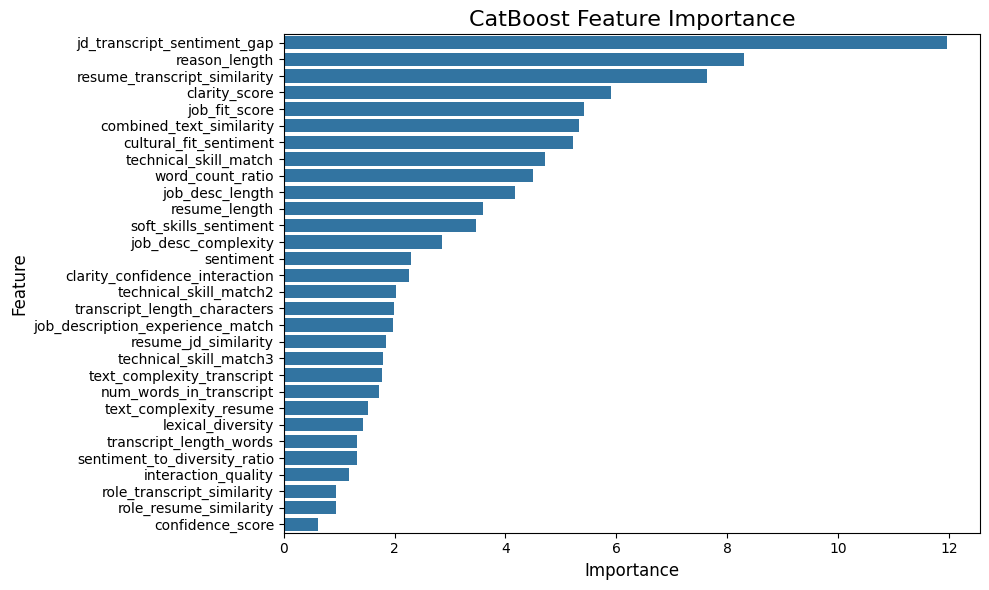


Top 5 most impactful features:
jd_transcript_sentiment_gap: Importance = 11.9639
reason_length: Importance = 8.2968
resume_transcript_similarity: Importance = 7.6403
clarity_score: Importance = 5.9094
job_fit_score: Importance = 5.4244


In [69]:
# --- CatBoost Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance_df)
plt.title('CatBoost Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()  # Ensures the plot looks clean
plt.show()

# --- Summary ---
top_catboost_features = catboost_feature_importance_df.head(5)  # Top 5 features by importance

print("\nTop 5 most impactful features:")
for _, row in top_catboost_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")


In [70]:
data

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume  decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...         0   
1     Here's a resume for Hank Brown, a select candi...         1   
2     Here's a sample resume for Bob Jones, who appl...         0   
3     Here's a sample resume for Bob Miller, a Softw...         1   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...         0   
...                                                 ...       ...   
3169  ananya bansal\ncontact information:\n\n* phone...         1   
3170  diya singh\ncontact information:\n\n* email: [...         0   
3171  harshitha kapoor\nui engineer\n\ncontact infor...         1   
3172  kabir chopra\ncontact information:\n\n* email:...         0   
3173  aditya singh\ncontact information:\n\n* email:...         0   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  resume_jd_similarity  ...  \
0                         528              0.552990  ...   
1                         804              0.345283  ...   
2                         503              0.666840  ...   
3                         665              0.533122  ...   
4                         573              0.597536  ...   
...                     

In [71]:
from sklearn.neural_network import MLPClassifier
# Neural Network (MLPClassifier) with Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

# Define the MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Utilize all processors for faster computation
    verbose=1   # Show progress
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model and predictions
mlp_best = grid_search.best_estimator_
mlp_y_pred = mlp_best.predict(X_test)

# Performance metrics
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_roc_auc = roc_auc_score(y_test, mlp_best.predict_proba(X_test)[:, 1])

# Output results
print(f"MLPClassifier Accuracy: {mlp_accuracy * 100:.2f}%")
print(f"MLPClassifier ROC AUC: {mlp_roc_auc:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLPClassifier Accuracy: 75.91%
MLPClassifier ROC AUC: 0.8465


In [72]:
# Error Analysis for MLPClassifier
mlp_errors = X_test.copy()
mlp_errors['True Label'] = y_test
mlp_errors['Predicted Label'] = mlp_y_pred  # Reuse predictions from earlier
mlp_errors['Error'] = mlp_errors['True Label'] != mlp_errors['Predicted Label']

# Extracting misclassified instances
misclassified_mlp = mlp_errors[mlp_errors['Error']]
print(f"Misclassified Instances (MLPClassifier):{len(misclassified_mlp)}")


Misclassified Instances (MLPClassifier):153


In [73]:
from sklearn.inspection import permutation_importance

# Permutation-based Feature Importance
mlp_perm_importance = permutation_importance(mlp_best, X_test, y_test, n_repeats=10, random_state=42)

# Creating a DataFrame for Feature Importance
mlp_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mlp_perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print("Impact Analysis (MLPClassifier):")
mlp_feature_importance_df


Impact Analysis (MLPClassifier):


Feature    Importance
20      transcript_length_characters  2.692913e-01
27               interaction_quality  5.527559e-02
0            num_words_in_transcript  4.692913e-02
12                   job_desc_length  4.535433e-02
18    clarity_confidence_interaction  4.236220e-02
7                      resume_length  4.141732e-02
5            transcript_length_words  2.125984e-02
26               job_desc_complexity  1.937008e-02
16                     clarity_score  8.661417e-03
24  job_description_experience_match  3.307087e-03
6                      reason_length  3.307087e-03
10            cultural_fit_sentiment  2.362205e-03
11       jd_transcript_sentiment_gap  1.417323e-03
3                          sentiment  0.000000e+00
23            technical_skill_match3  0.000000e+00
22            technical_skill_match2  0.000000e+00
21             technical_skill_match  0.000000e+00
14          combined_text_similarity  0.000000e+00
28        text_complexity_transcript  0.000000e+00
4                  lexical_diversity  0.000000e+00
9         role_transcript_similarity  0.000000e+00
8                   word_count_ratio -1.110223e-17
19             soft_skills_sentiment -1.574803e-04
2       resume_transcript_similarity -3.149606e-04
13            role_resume_similarity -3.149606e-04
17                  confidence_score -4.724409e-04
15      sentiment_to_diversity_ratio -7.874016e-04
29            text_complexity_resume -7.874016e-04
25                     job_fit_score -9.448819e-04
1               resume_jd_similarity -1.259843e-03

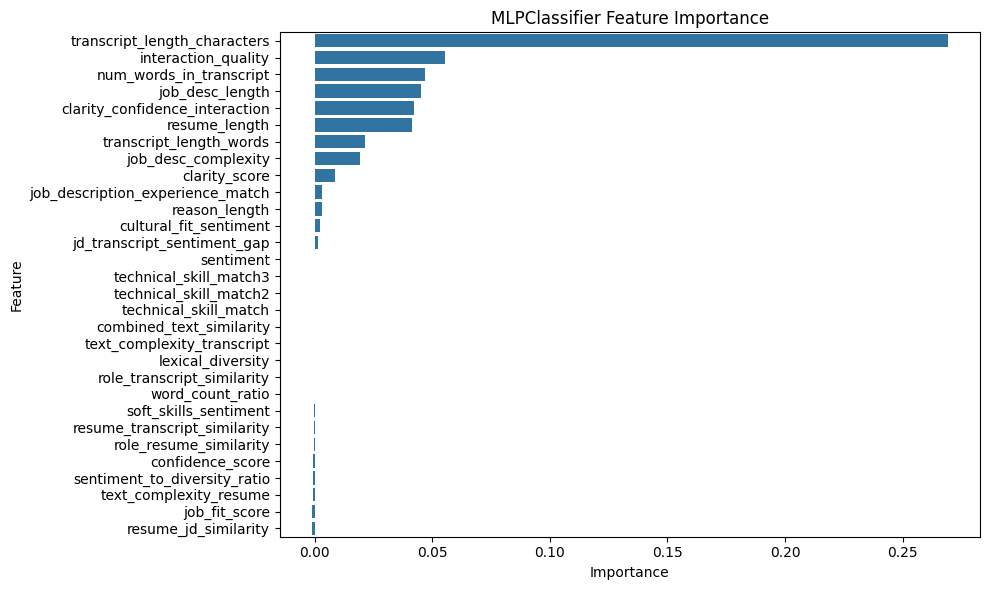


Top 5 most impactful features:
transcript_length_characters: Importance = 0.2693
interaction_quality: Importance = 0.0553
num_words_in_transcript: Importance = 0.0469
job_desc_length: Importance = 0.0454
clarity_confidence_interaction: Importance = 0.0424


In [74]:
# --- MLPClassifier Feature Importance ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_feature_importance_df)
plt.title('MLPClassifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Summary ---
top_mlp_features = mlp_feature_importance_df.head(5)  # Top 5 features by importance

# Summarizing the plot
print("\nTop 5 most impactful features:")
for i, row in top_mlp_features.iterrows():
    print(f"{row['Feature']}: Importance = {row['Importance']:.4f}")

Model Comparison Table:
                 Model  Accuracy (%)   ROC AUC
4    Gradient Boosting     88.976378  0.971668
3              XGBoost     88.503937  0.970706
5             AdaBoost     88.503937  0.969555
6             CatBoost     88.031496  0.970041
2        Random Forest     87.874016  0.969962
1        Decision Tree     85.826772  0.891721
0  Logistic Regression     81.574803  0.907762
7                  MLP     75.905512  0.846484


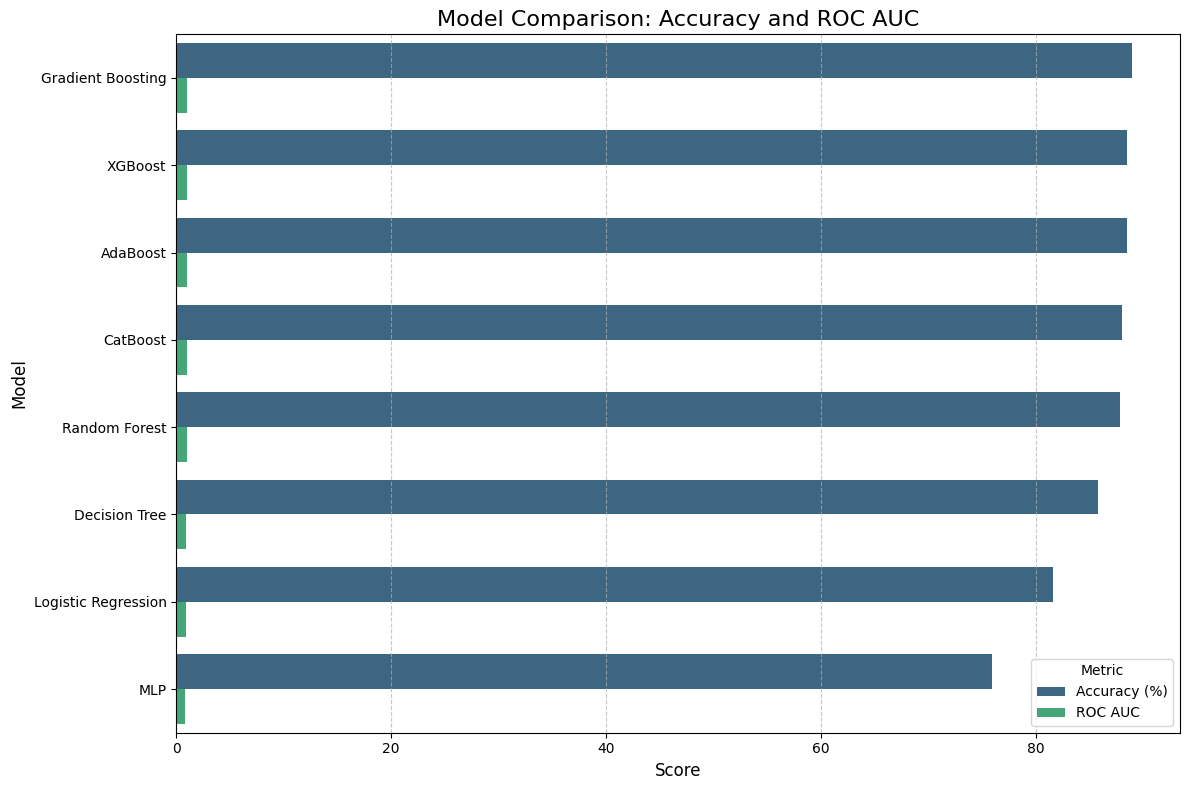


Summary of the Model Comparison:
1. The best-performing model based on Accuracy is: Gradient Boosting with an Accuracy of 88.98%.
2. The best-performing model based on ROC AUC is: Gradient Boosting with a ROC AUC score of 0.97.
3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.


In [75]:
# Define models and their respective accuracy and ROC AUC scores
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
    'Gradient Boosting', 'AdaBoost', 'CatBoost', 'MLP'
]

# Accuracy scores from the above calculations
accuracies = [
    log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, 
    gb_accuracy, ada_boost_accuracy, catboost_accuracy, mlp_accuracy
]

# ROC AUC scores from the above calculations
roc_auc_scores = [
    log_reg_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc, 
    gb_roc_auc, ada_boost_roc_auc, catboost_roc_auc, mlp_roc_auc
]

# Convert accuracies to percentages
accuracies_percent = [acc * 100 for acc in accuracies]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracies_percent,
    'ROC AUC': roc_auc_scores
}).sort_values(by='Accuracy (%)', ascending=False)

# Display comparison DataFrame
print("Model Comparison Table:")
print(comparison_df)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df.melt(id_vars='Model', value_vars=['Accuracy (%)', 'ROC AUC']),
    x='value', y='Model', hue='variable', palette='viridis'
)
plt.title('Model Comparison: Accuracy and ROC AUC', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Metric', fontsize=10, loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary
best_accuracy_model = comparison_df.iloc[0]
best_auc_model = comparison_df.sort_values(by='ROC AUC', ascending=False).iloc[0]

print("\nSummary of the Model Comparison:")
print(f"1. The best-performing model based on Accuracy is: {best_accuracy_model['Model']} "
      f"with an Accuracy of {best_accuracy_model['Accuracy (%)']:.2f}%.")
print(f"2. The best-performing model based on ROC AUC is: {best_auc_model['Model']} "
      f"with a ROC AUC score of {best_auc_model['ROC AUC']:.2f}.")
print("3. This comparison highlights the trade-offs between Accuracy and ROC AUC across models.")


In [76]:
#Gradient Boosting  is the best model in my analysis so now 

 97%|=================== | 2458/2539 [00:14<00:00]       

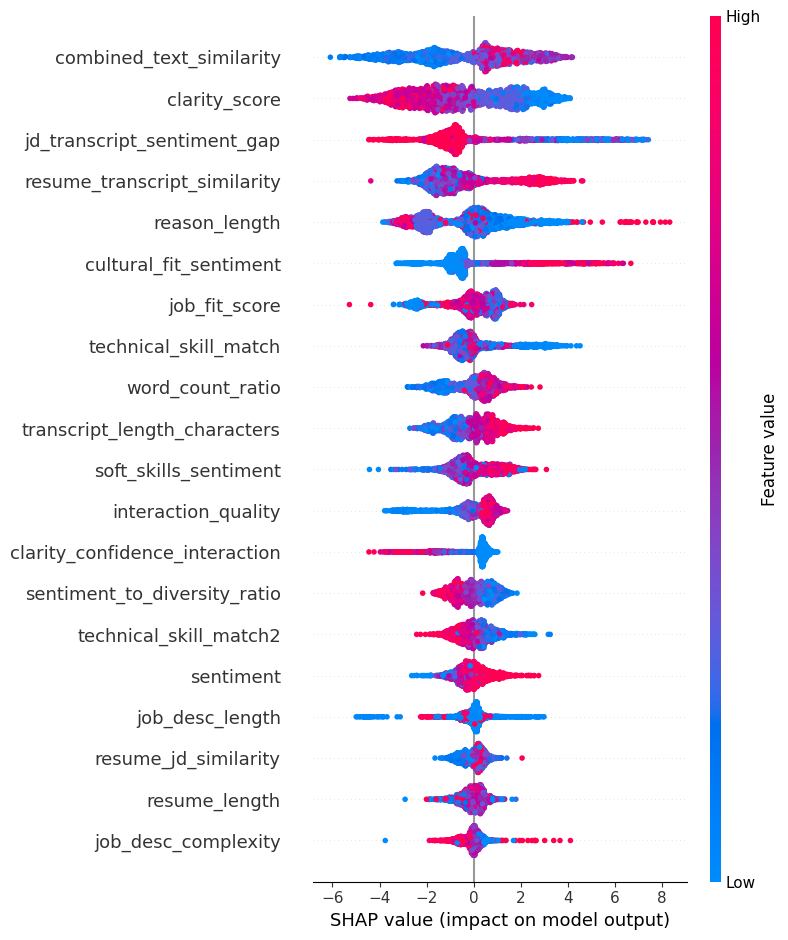

In [77]:
import shap

# Ensure you're using the best model from Gradient Boosting Classifier (gb_best)
explainer = shap.Explainer(gb_best, X_train)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_train)


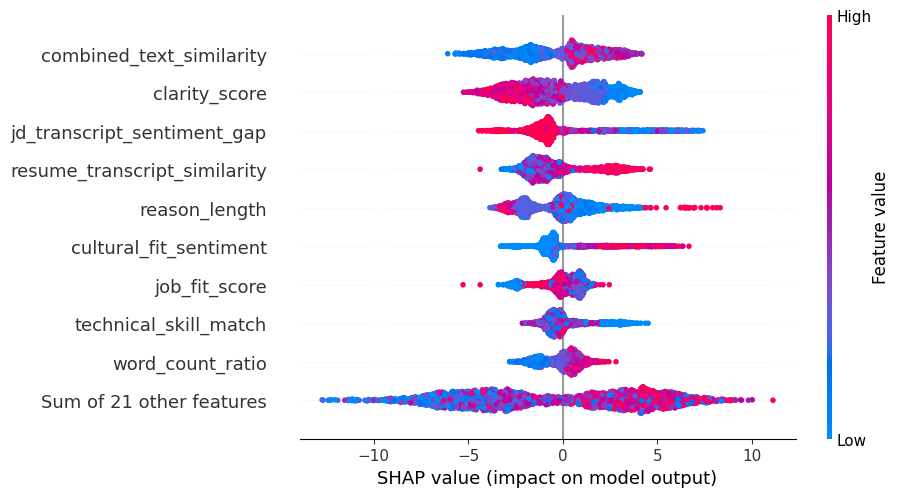

In [78]:
# Beeswarm plot for SHAP values
shap.plots.beeswarm(shap_values)


In [1]:
'''
combined_text_similarity
Impact: High values (red) increase the model's output, while low values (blue) slightly decrease it.
Insight: A high similarity between the resume and job description correlates positively with the model's predictions.

clarity_score
Impact: Higher clarity scores (red) generally boost predictions, while lower scores (blue) tend to reduce them slightly.
Insight: Clearer resumes or transcripts improve the likelihood of positive predictions.

jd_transcript_sentiment_gap
Impact: Larger gaps (red) contribute positively, while smaller gaps (blue) have little or no effect.
Insight: Greater sentiment differences between the job description and transcript positively influence the predictions.

resume_transcript_similarity
Impact: Higher similarity values (red) enhance the model's output, while lower values (blue) reduce it slightly.
Insight: A closer match between resume content and transcript content positively affects predictions.

reason_length
Impact: Longer reasoning (red) has a positive impact, while shorter reasoning (blue) shows mixed effects.
Insight: Moderately long explanations or justifications positively influence the predictions.

cultural_fit_sentiment
Impact: Higher sentiment values (red) strongly increase predictions, while lower sentiment (blue) reduces them significantly.
Insight: Positive sentiment toward cultural fit is a strong indicator of a favorable outcome.

job_fit_score
Impact: Higher scores (red) increase predictions slightly, while lower scores (blue) decrease them.
Insight: Alignment with job requirements positively impacts predictions but is less influential than other features.

technical_skill_match
Impact: Higher values (red) moderately improve predictions, while lower values (blue) decrease them.
Insight: Technical skill alignment plays a role in enhancing predictions.

word_count_ratio
Impact: Higher word count ratios (red) tend to improve predictions slightly. Lower ratios (blue) have minimal or negative effects.
Insight: A balanced word count ratio contributes modestly to prediction accuracy.

Sum of 21 other features
Impact: The collective impact of the remaining features is generally centered around zero with minor fluctuations.
Insight: These features have minimal influence on the model's predictions compared to the more significant features listed above.'''

"\ncombined_text_similarity\nImpact: High values (red) increase the model's output, while low values (blue) slightly decrease it.\nInsight: A high similarity between the resume and job description correlates positively with the model's predictions.\n\nclarity_score\nImpact: Higher clarity scores (red) generally boost predictions, while lower scores (blue) tend to reduce them slightly.\nInsight: Clearer resumes or transcripts improve the likelihood of positive predictions.\n\njd_transcript_sentiment_gap\nImpact: Larger gaps (red) contribute positively, while smaller gaps (blue) have little or no effect.\nInsight: Greater sentiment differences between the job description and transcript positively influence the predictions.\n\nresume_transcript_similarity\nImpact: Higher similarity values (red) enhance the model's output, while lower values (blue) reduce it slightly.\nInsight: A closer match between resume content and transcript content positively affects predictions.\n\nreason_length\nIm

In [2]:
base_value  = explainer.expected_value
print(f"Base Value: {base_value}")

NameError: name 'explainer' is not defined

In [81]:
shap_values_test = explainer(X_test)  



--- SHAP Waterfall Plot for Instance 1 ---


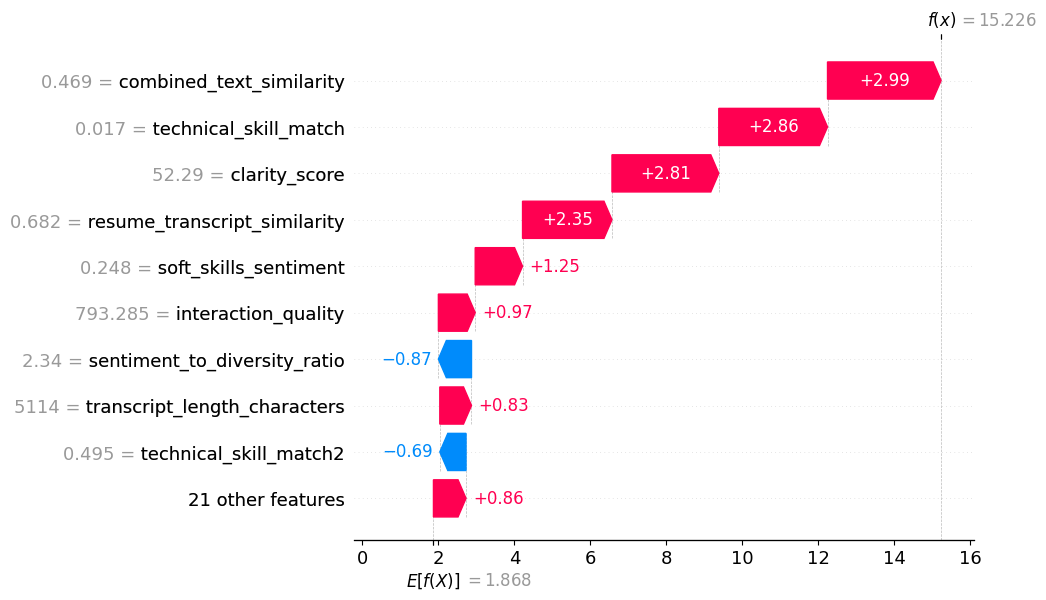


Summary:
Base Probability: 86.6271%
Predicted Probability: 100.0000%

Top Contributing Features:
  - combined_text_similarity: 2.9885 (increases prediction)
  - technical_skill_match: 2.8609 (increases prediction)
  - clarity_score: 2.8107 (increases prediction)
  - resume_transcript_similarity: 2.3534 (increases prediction)
  - soft_skills_sentiment: 1.2455 (increases prediction)

Feature Value Insights:
  - combined_text_similarity has a value of 0.4693, contributing 2.9885.
  - technical_skill_match has a value of 0.0175, contributing 2.8609.
  - clarity_score has a value of 52.2900, contributing 2.8107.
  - resume_transcript_similarity has a value of 0.6824, contributing 2.3534.
  - soft_skills_sentiment has a value of 0.2480, contributing 1.2455.

--- SHAP Waterfall Plot for Instance 2 ---


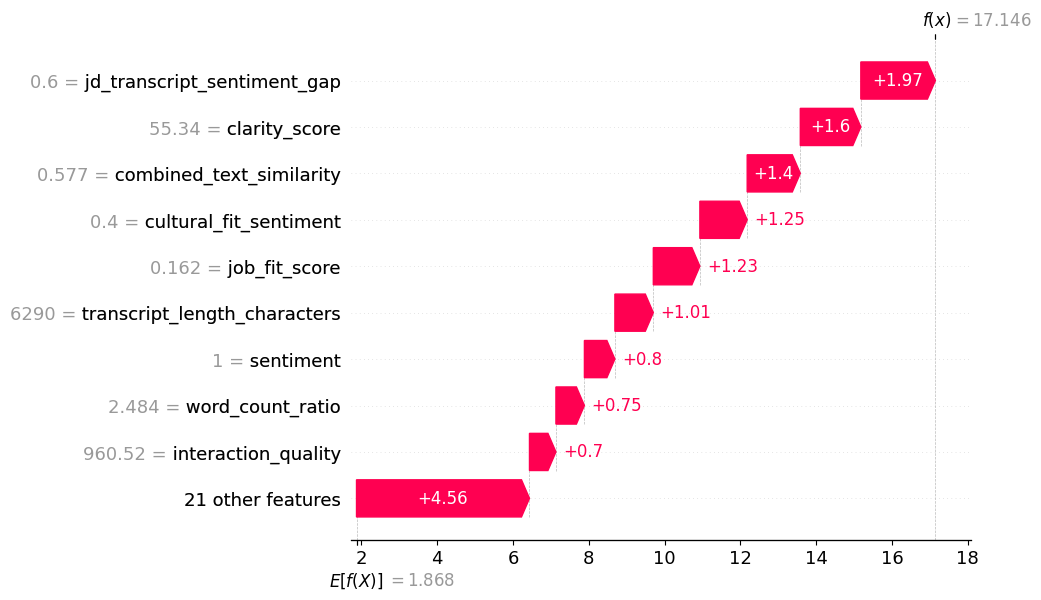


Summary:
Base Probability: 86.6271%
Predicted Probability: 100.0000%

Top Contributing Features:
  - jd_transcript_sentiment_gap: 1.9681 (increases prediction)
  - clarity_score: 1.5975 (increases prediction)
  - combined_text_similarity: 1.4014 (increases prediction)
  - cultural_fit_sentiment: 1.2488 (increases prediction)
  - job_fit_score: 1.2287 (increases prediction)

Feature Value Insights:
  - jd_transcript_sentiment_gap has a value of 0.5995, contributing 1.9681.
  - clarity_score has a value of 55.3400, contributing 1.5975.
  - combined_text_similarity has a value of 0.5770, contributing 1.4014.
  - cultural_fit_sentiment has a value of 0.4000, contributing 1.2488.
  - job_fit_score has a value of 0.1617, contributing 1.2287.

--- SHAP Waterfall Plot for Instance 3 ---


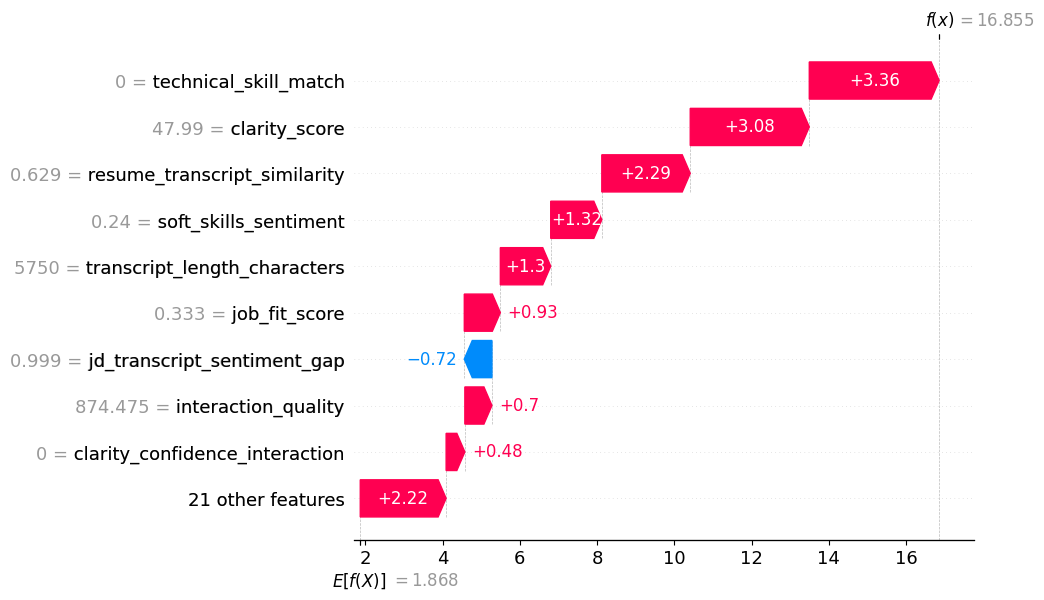


Summary:
Base Probability: 86.6271%
Predicted Probability: 100.0000%

Top Contributing Features:
  - technical_skill_match: 3.3624 (increases prediction)
  - clarity_score: 3.0819 (increases prediction)
  - resume_transcript_similarity: 2.2892 (increases prediction)
  - soft_skills_sentiment: 1.3226 (increases prediction)
  - transcript_length_characters: 1.3045 (increases prediction)

Feature Value Insights:
  - technical_skill_match has a value of 0.0000, contributing 3.3624.
  - clarity_score has a value of 47.9900, contributing 3.0819.
  - resume_transcript_similarity has a value of 0.6285, contributing 2.2892.
  - soft_skills_sentiment has a value of 0.2404, contributing 1.3226.
  - transcript_length_characters has a value of 5750.0000, contributing 1.3045.


In [83]:
# Iterate through the first 3 instances
import numpy as np
for i in range(3):
    instance_index = i
    shap_value = shap_values_test[instance_index]
    
    # Generate the waterfall plot
    print(f"\n--- SHAP Waterfall Plot for Instance {instance_index + 1} ---")
    shap.plots.waterfall(shap_value)
    
    # Extract information for summary
    feature_contributions = shap_value.values
    base_value = shap_value.base_values 
    predicted_value = base_value + feature_contributions.sum() 
    feature_names = shap_value.feature_names
    top_features = sorted(zip(feature_names, feature_contributions), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Convert log-odds to probabilities
    base_probability = 1 / (1 + np.exp(-base_value))  
    predicted_probability = 1 / (1 + np.exp(-predicted_value)) 
    
    # Print summary
    print("\nSummary:")
    print(f"Base Probability: {base_probability:.4%}")
    print(f"Predicted Probability: {predicted_probability:.4%}")
    
    print("\nTop Contributing Features:")
    for feature, contribution in top_features:
        direction = "increases" if contribution > 0 else "decreases"
        print(f"  - {feature}: {contribution:.4f} ({direction} prediction)")
    
    #Feature value insight
    print("\nFeature Value Insights:")
    for feature, contribution in top_features:
        feature_index = feature_names.index(feature)
        feature_value = shap_value.data[feature_index]
        print(f"  - {feature} has a value of {feature_value:.4f}, contributing {contribution:.4f}.")


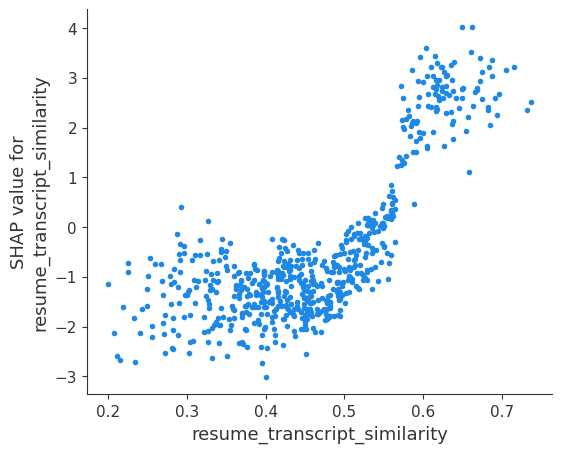

' \nAs the resume_transcript_similarity increases, especially beyond a similarity score of 0.6, it strongly boosts the model’s predictions. \nThis suggests that a higher alignment between the resume and transcript has a progressively more positive impact on the outcome, with a sharper influence at higher similarity levels.\n'

In [84]:
# Dependency Plot Feature 1
features_to_plot = "resume_transcript_similarity" 
shap.dependence_plot(
    ind=features_to_plot, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)


''' 
As the resume_transcript_similarity increases, especially beyond a similarity score of 0.6, it strongly boosts the model’s predictions. 
This suggests that a higher alignment between the resume and transcript has a progressively more positive impact on the outcome, with a sharper influence at higher similarity levels.
'''

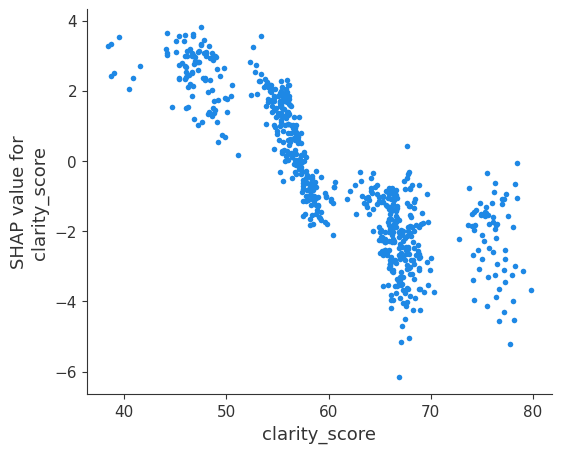

"' \nThe plot reveals that lower clarity_scores are associated with stronger positive model predictions, whereas higher clarity_scores (above 70) tend to negatively influence the model’s predictions. \nThis suggests that, for this model, clarity scores in the lower range might be viewed as beneficial, but as clarity improves, the model’s output declines.\n"

In [85]:
# Dependency Plot Feature 2
feature_name = "clarity_score"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values,  
    feature_names=X_test.columns, 
    interaction_index=None, 
    cmap=plt.cm.Reds  
)

'''' 
The plot reveals that lower clarity_scores are associated with stronger positive model predictions, whereas higher clarity_scores (above 70) tend to negatively influence the model’s predictions. 
This suggests that, for this model, clarity scores in the lower range might be viewed as beneficial, but as clarity improves, the model’s output declines.
'''


In [1]:
# Dependency Plot for Feature 3
feature_name = "num_words_in_transcript"  

shap.dependence_plot(
    ind=feature_name, 
    shap_values=shap_values_test.values,  
    features=X_test.values, 
    feature_names=X_test.columns,  
    interaction_index=None,  
    cmap=plt.cm.Reds  
)



''' In this num_words_in_transcript Dependency plot from 400 to 1000 it gradually increasing 
    As num_words_in_transcript increases, SHAP values generally become positive.
    Shorter transcripts below 200 words have a negative impact on predictions.
    Key Insight: More words in a transcript positively influence the model's output.
'''

NameError: name 'shap' is not defined

In [87]:
data.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description', 'num_words_in_transcript',
       'resume_jd_similarity', 'resume_transcript_similarity', 'sentiment',
       'lexical_diversity', 'transcript_length_words', 'reason_length',
       'resume_length', 'word_count_ratio', 'role_transcript_similarity',
       'cultural_fit_sentiment', 'jd_transcript_sentiment_gap',
       'job_desc_length', 'role_resume_similarity', 'combined_text_similarity',
       'sentiment_to_diversity_ratio', 'clarity_score', 'confidence_score',
       'clarity_confidence_interaction', 'soft_skills_sentiment',
       'transcript_length_characters', 'technical_skill_match',
       'technical_skill_match2', 'technical_skill_match3',
       'job_description_experience_match', 'job_fit_score',
       'job_desc_complexity', 'interaction_quality',
       'text_complexity_transcript', 'text_complexity_resume'],
      dtype='object')

In [88]:
from sklearn.inspection import PartialDependenceDisplay

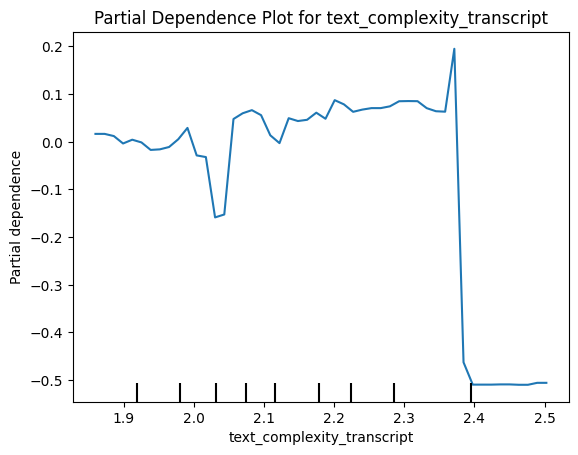

"'\nThe partial dependence remains relatively stable for text complexity values between 1.9 and 2.1.\nA noticeable decline occurs after 2.1, followed by a sharp drop after 2.3.\nBeyond 2.4, the curve flattens at a low value, indicating minimal further influence.\nKey Insight: Higher text complexity in the transcript negatively impacts the model's output, with a steep decline beyond 2.3.\n"

In [89]:
#PartialDependence Plot for Feature
feature_name = "text_complexity_transcript"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=gb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,  
    kind="average" 
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()


''''
The partial dependence remains relatively stable for text complexity values between 1.9 and 2.1.
A noticeable decline occurs after 2.1, followed by a sharp drop after 2.3.
Beyond 2.4, the curve flattens at a low value, indicating minimal further influence.
Key Insight: Higher text complexity in the transcript negatively impacts the model's output, with a steep decline beyond 2.3.
'''

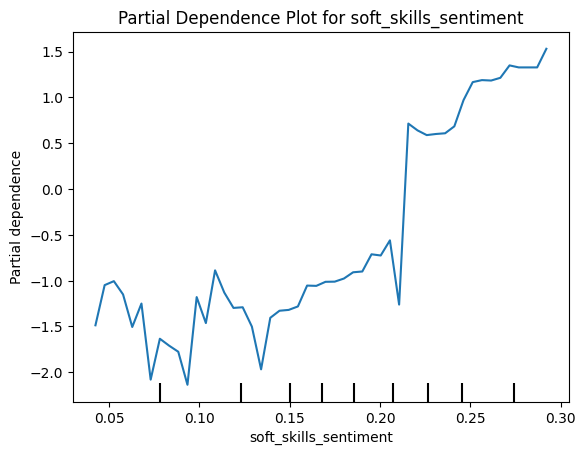

"\nIn this soft_skills_sentiment Partial Dependence plot:  \n- At lower values (0.05–0.10), the partial dependence value decreases slightly, with the lowest point around 0.46 near 0.15.  \n- Beyond 0.15, the curve begins to rise steadily, indicating a positive influence of soft_skills_sentiment on the model's output.  \n- At higher values (0.25–0.30), the partial dependence stabilizes around 0.50, showing a strong positive impact.  \n\nKey Insight: \nHigher sentiment scores for soft skills positively contribute to the model's predictions, especially above 0.15.  \n"

In [90]:
#PartialDependence Plot for Feature2
feature_name = "soft_skills_sentiment"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=gb_best,
    X=X_test,  
    features=[feature_index], 
    feature_names=X_test.columns,  
    grid_resolution=50,
    kind="average"  
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

'''
In this soft_skills_sentiment Partial Dependence plot:  
- At lower values (0.05–0.10), the partial dependence value decreases slightly, with the lowest point around 0.46 near 0.15.  
- Beyond 0.15, the curve begins to rise steadily, indicating a positive influence of soft_skills_sentiment on the model's output.  
- At higher values (0.25–0.30), the partial dependence stabilizes around 0.50, showing a strong positive impact.  

Key Insight: 
Higher sentiment scores for soft skills positively contribute to the model's predictions, especially above 0.15.  
'''


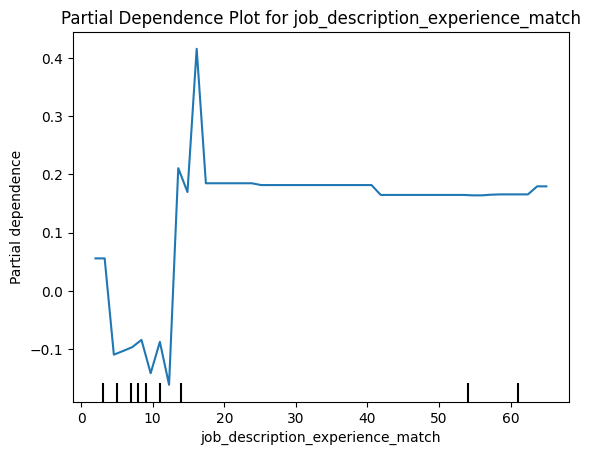

'\nThe partial dependence slightly decreases below 0 for values up to 10.\nA sharp increase is observed between 10 and 20, peaking above 0.4.\nBeyond 20, the curve stabilizes around 0.2 with minimal variation, indicating a consistent influence.\nKey Insight: A strong match in job description and experience positively impacts the model’s output, with a peak effect between 10 and 20.\n'

In [91]:
feature_name = "job_description_experience_match"
feature_index = X_test.columns.get_loc(feature_name)

PartialDependenceDisplay.from_estimator(
    estimator=gb_best,
    X=X_test, 
    features=[feature_index], 
    feature_names=X_test.columns, 
    grid_resolution=50,  
    kind="average"  # Fixed the typo here
)
plt.title(f"Partial Dependence Plot for {feature_name}")
plt.show()

'''
The partial dependence slightly decreases below 0 for values up to 10.
A sharp increase is observed between 10 and 20, peaking above 0.4.
Beyond 20, the curve stabilizes around 0.2 with minimal variation, indicating a consistent influence.
Key Insight: A strong match in job description and experience positively impacts the model’s output, with a peak effect between 10 and 20.
'''



--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


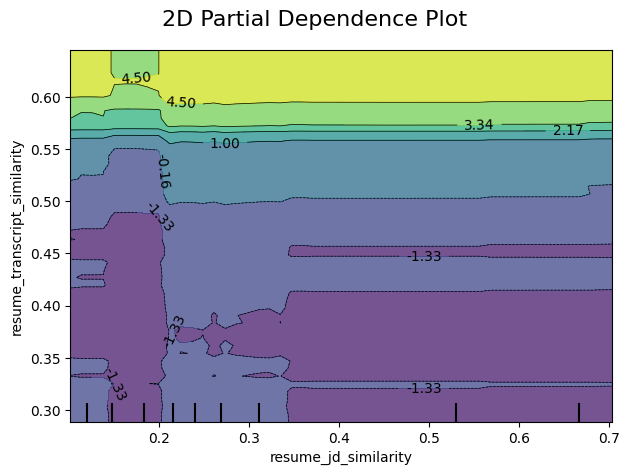

"\nLower values of both features (e.g., resume_jd_similarity < 0.3 and resume_transcript_similarity < 0.4) correspond to lower model outputs, approximately 0.36.\nAs the values of these features increase, the model output improves, peaking at around 0.68 in the top-right region of the plot.\nKey Insight: A stronger similarity between the resume and job description, as well as between the resume and transcript, positively influences the model's predictions.\n"

In [92]:

features = [('resume_jd_similarity', 'resume_transcript_similarity')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=gb_best,
    X=X_train,  
    features=features, 
    grid_resolution=50,
    kind='average',
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

'''the lighter color indicate the more probability 
   the darker color indicate the less probability
'''
'''
Lower values of both features (e.g., resume_jd_similarity < 0.3 and resume_transcript_similarity < 0.4) correspond to lower model outputs, approximately 0.36.
As the values of these features increase, the model output improves, peaking at around 0.68 in the top-right region of the plot.
Key Insight: A stronger similarity between the resume and job description, as well as between the resume and transcript, positively influences the model's predictions.
'''


--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---


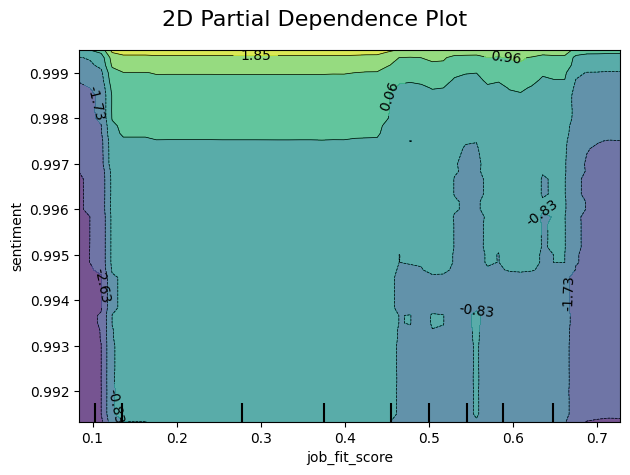

"\nIn this 2D Partial Dependence Plot:  \n- Low `job_fit_score` values (e.g., < 0.2) result in reduced model outputs (e.g., ~0.48 to ~0.53), irrespective of `sentiment`.  \n- The model's output sharply increases for higher `job_fit_score` values (e.g., > 0.5), indicating significant influence from this feature.  \n- For higher `sentiment` values, the effect of `job_fit_score` is amplified, especially in the region where both features are high.  \n\nKey Insight: \nA higher job fit score, combined with a positive sentiment, greatly enhances the model's output predictions.  \n\n"

In [93]:

features = [('job_fit_score', 'sentiment')]  # 2D feature tuple

print("\n--- 2D Partial Dependence Plot for 'resume_jd_similarity' and 'resume_transcript_similarity' ---")
PartialDependenceDisplay.from_estimator(
    estimator=gb_best, 
    X=X_train, 
    features=features,  
    grid_resolution=50, 
    kind='average', 
)

# Show the plot
plt.suptitle("2D Partial Dependence Plot", fontsize=16)
plt.tight_layout()
plt.show()

'''
In this 2D Partial Dependence Plot:  
- Low `job_fit_score` values (e.g., < 0.2) result in reduced model outputs (e.g., ~0.48 to ~0.53), irrespective of `sentiment`.  
- The model's output sharply increases for higher `job_fit_score` values (e.g., > 0.5), indicating significant influence from this feature.  
- For higher `sentiment` values, the effect of `job_fit_score` is amplified, especially in the region where both features are high.  

Key Insight: 
A higher job fit score, combined with a positive sentiment, greatly enhances the model's output predictions.  

'''

In [94]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [95]:
from transformers import BertTokenizer, BertModel
import torch

In [96]:
from transformers import DistilBertTokenizer, DistilBertModel

In [97]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [98]:
def get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32):
    embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size  # Total number of batches
    print(f"Total Batches: {total_batches}")
    
    for i in range(total_batches):
        # Print progress
        print(f"Processing batch {i + 1}/{total_batches}...")
        
        # Get the current batch
        batch = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Use the [CLS] token representation for each text in the batch
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.extend(batch_embeddings)
    
    return embeddings

In [99]:
#Transcript
texts = data['Transcript'].tolist()

In [100]:
batch_embeddings = get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32)

Total Batches: 100
Processing batch 1/100...
Processing batch 2/100...
Processing batch 3/100...
Processing batch 4/100...
Processing batch 5/100...
Processing batch 6/100...
Processing batch 7/100...
Processing batch 8/100...
Processing batch 9/100...
Processing batch 10/100...
Processing batch 11/100...
Processing batch 12/100...
Processing batch 13/100...
Processing batch 14/100...
Processing batch 15/100...
Processing batch 16/100...
Processing batch 17/100...
Processing batch 18/100...
Processing batch 19/100...
Processing batch 20/100...
Processing batch 21/100...
Processing batch 22/100...
Processing batch 23/100...
Processing batch 24/100...
Processing batch 25/100...
Processing batch 26/100...
Processing batch 27/100...
Processing batch 28/100...
Processing batch 29/100...
Processing batch 30/100...
Processing batch 31/100...
Processing batch 32/100...
Processing batch 33/100...
Processing batch 34/100...
Processing batch 35/100...
Processing batch 36/100...
Processing batch 3

In [101]:
data['bert_embeddings_trans'] = batch_embeddings

In [102]:
texts = data['Resume'].tolist()

In [103]:
batch_embeddings = get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32)

Total Batches: 100
Processing batch 1/100...
Processing batch 2/100...
Processing batch 3/100...
Processing batch 4/100...
Processing batch 5/100...
Processing batch 6/100...
Processing batch 7/100...
Processing batch 8/100...
Processing batch 9/100...
Processing batch 10/100...
Processing batch 11/100...
Processing batch 12/100...
Processing batch 13/100...
Processing batch 14/100...
Processing batch 15/100...
Processing batch 16/100...
Processing batch 17/100...
Processing batch 18/100...
Processing batch 19/100...
Processing batch 20/100...
Processing batch 21/100...
Processing batch 22/100...
Processing batch 23/100...
Processing batch 24/100...
Processing batch 25/100...
Processing batch 26/100...
Processing batch 27/100...
Processing batch 28/100...
Processing batch 29/100...
Processing batch 30/100...
Processing batch 31/100...
Processing batch 32/100...
Processing batch 33/100...
Processing batch 34/100...
Processing batch 35/100...
Processing batch 36/100...
Processing batch 3

In [104]:
data['bert_embeddings_resume'] = batch_embeddings

In [105]:
data

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume  decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...         0   
1     Here's a resume for Hank Brown, a select candi...         1   
2     Here's a sample resume for Bob Jones, who appl...         0   
3     Here's a sample resume for Bob Miller, a Softw...         1   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...         0   
...                                                 ...       ...   
3169  ananya bansal\ncontact information:\n\n* phone...         1   
3170  diya singh\ncontact information:\n\n* email: [...         0   
3171  harshitha kapoor\nui engineer\n\ncontact infor...         1   
3172  kabir chopra\ncontact information:\n\n* email:...         0   
3173  aditya singh\ncontact information:\n\n* email:...         0   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  resume_jd_similarity  ...  \
0                         528              0.552990  ...   
1                         804              0.345283  ...   
2                         503              0.666840  ...   
3                         665              0.533122  ...   
4                         573              0.597536  ...   
...                     

In [106]:
texts = data['Reason_for_decision'].tolist()

In [107]:
batch_embeddings = get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32)

Total Batches: 100
Processing batch 1/100...
Processing batch 2/100...
Processing batch 3/100...
Processing batch 4/100...
Processing batch 5/100...
Processing batch 6/100...
Processing batch 7/100...
Processing batch 8/100...
Processing batch 9/100...
Processing batch 10/100...
Processing batch 11/100...
Processing batch 12/100...
Processing batch 13/100...
Processing batch 14/100...
Processing batch 15/100...
Processing batch 16/100...
Processing batch 17/100...
Processing batch 18/100...
Processing batch 19/100...
Processing batch 20/100...
Processing batch 21/100...
Processing batch 22/100...
Processing batch 23/100...
Processing batch 24/100...
Processing batch 25/100...
Processing batch 26/100...
Processing batch 27/100...
Processing batch 28/100...
Processing batch 29/100...
Processing batch 30/100...
Processing batch 31/100...
Processing batch 32/100...
Processing batch 33/100...
Processing batch 34/100...
Processing batch 35/100...
Processing batch 36/100...
Processing batch 3

In [110]:
#reason for decision

from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

texts = data['Reason_for_decision'].tolist()  # Replace 'text_column' with the actual column name
batch_embeddings = []
for text in texts:
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()  # Get sentence embedding
    batch_embeddings.append(embeddings[0])

# Ensure embeddings length matches the data length
data['bert_embeddings_dr'] = batch_embeddings


In [111]:
data

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume  decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...         0   
1     Here's a resume for Hank Brown, a select candi...         1   
2     Here's a sample resume for Bob Jones, who appl...         0   
3     Here's a sample resume for Bob Miller, a Softw...         1   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...         0   
...                                                 ...       ...   
3169  ananya bansal\ncontact information:\n\n* phone...         1   
3170  diya singh\ncontact information:\n\n* email: [...         0   
3171  harshitha kapoor\nui engineer\n\ncontact infor...         1   
3172  kabir chopra\ncontact information:\n\n* email:...         0   
3173  aditya singh\ncontact information:\n\n* email:...         0   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  resume_jd_similarity  ...  \
0                         528              0.552990  ...   
1                         804              0.345283  ...   
2                         503              0.666840  ...   
3                         665              0.533122  ...   
4                         573              0.597536  ...   
...                     

In [112]:
#Job Description
texts = data['Job_Description'].tolist()

In [113]:
batch_embeddings = get_bert_embeddings_batch(texts, tokenizer, model, batch_size=32)


Total Batches: 100
Processing batch 1/100...
Processing batch 2/100...
Processing batch 3/100...
Processing batch 4/100...
Processing batch 5/100...
Processing batch 6/100...
Processing batch 7/100...
Processing batch 8/100...
Processing batch 9/100...
Processing batch 10/100...
Processing batch 11/100...
Processing batch 12/100...
Processing batch 13/100...
Processing batch 14/100...
Processing batch 15/100...
Processing batch 16/100...
Processing batch 17/100...
Processing batch 18/100...
Processing batch 19/100...
Processing batch 20/100...
Processing batch 21/100...
Processing batch 22/100...
Processing batch 23/100...
Processing batch 24/100...
Processing batch 25/100...
Processing batch 26/100...
Processing batch 27/100...
Processing batch 28/100...
Processing batch 29/100...
Processing batch 30/100...
Processing batch 31/100...
Processing batch 32/100...
Processing batch 33/100...
Processing batch 34/100...
Processing batch 35/100...
Processing batch 36/100...
Processing batch 3

In [114]:
data['bert_embeddings_jd'] = batch_embeddings

In [115]:
data

ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated interview for a Data Engine...   
...                                                 ...   
3169  here's a realistic interview transcript for th...   
3170  interview transcript for product manager role\...   
3171  interviewer: hi harshitha, thanks for coming i...   
3172  here's a realistic interview transcript for ka...   
3173  interview transcript\n\ninterviewer: hi aditya...   

                                                 Resume  decision  \
0     Here's a sample resume for Alice Smith:\n\n**A...         0   
1     Here's a resume for Hank Brown, a select candi...         1   
2     Here's a sample resume for Bob Jones, who appl...         0   
3     Here's a sample resume for Bob Miller, a Softw...         1   
4     Here's a sample resume for Ivy Jones:\n\n**Ivy...         0   
...                                                 ...       ...   
3169  ananya bansal\ncontact information:\n\n* phone...         1   
3170  diya singh\ncontact information:\n\n* email: [...         0   
3171  harshitha kapoor\nui engineer\n\ncontact infor...         1   
3172  kabir chopra\ncontact information:\n\n* email:...         0   
3173  aditya singh\ncontact information:\n\n* email:...         0   

                                    Reason_for_decision  \
0        Unsatisfactory references or background check.   
1                      Growth mindset and adaptability.   
2     Inadequate communication or interpersonal skills.   
3                                  Strong cultural fit.   
4                Lack of relevant skills or experience.   
...                                                 ...   
3169                                     experience gap   
3170                                    business acumen   
3171                                       cultural fit   
3172                                technical knowledge   
3173                                     experience gap   

                                        Job_Description  \
0     Here is a comprehensive job description for a ...   
1     Here is a job description for a Software Engin...   
2     Here is a comprehensive job description for a ...   
3     Here is a sample job description for a Softwar...   
4     Here is a sample job description for a Data En...   
...                                                 ...   
3169  \n        we are seeking a qualified data engi...   
3170  \n        we are seeking a qualified product m...   
3171  \n        we are seeking a qualified ui engine...   
3172  \n        we are seeking a qualified software ...   
3173  \n        we are seeking a qualified software ...   

      num_words_in_transcript  resume_jd_similarity  ...  \
0                         528              0.552990  ...   
1                         804              0.345283  ...   
2                         503              0.666840  ...   
3                         665              0.533122  ...   
4                         573              0.597536  ...   
...                     

In [116]:
trans_expanded = pd.DataFrame(data['bert_embeddings_trans'].tolist(), index=data.index)
trans_expanded.columns = [f'trans_emb_{i}' for i in range(trans_expanded.shape[1])]

In [117]:
resume_expanded = pd.DataFrame(data['bert_embeddings_resume'].tolist(), index=data.index)
resume_expanded.columns = [f'resume_emb_{i}' for i in range(resume_expanded.shape[1])]

In [118]:
jd_expanded = pd.DataFrame(data['bert_embeddings_jd'].tolist(), index=data.index)
jd_expanded.columns = [f'jd_emb_{i}' for i in range(resume_expanded.shape[1])]

In [120]:
rd_expanded = pd.DataFrame(data['bert_embeddings_dr'].tolist(), index=data.index)
rd_expanded.columns = [f'rd_emb_{i}' for i in range(resume_expanded.shape[1])]

In [122]:
data_expanded = pd.concat([data, trans_expanded, resume_expanded], axis=1)

In [123]:
data_expanded = data_expanded.drop(columns=['bert_embeddings_trans', 'bert_embeddings_resume','bert_embeddings_jd','bert_embeddings_dr'])

In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['decision_encoded'] = label_encoder.fit_transform(data['decision'])

embedding_columns = [col for col in data.columns if col.startswith(('trans_emb_', 'resume_emb_', 'jd_emb_', 'rd_emb_'))]

# Step 4: Split features and target
X = data[embedding_columns]
y = data['decision_encoded']


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
model = XGBClassifier(use_label_encoder=False,max_depth=5,n_estimators=200,learning_rate=0.1, eval_metric='logloss')
model.fit(X_train, y_train)

IndexError: list index out of range